To do:

- silhouette plot
- internal indices (compactedness etc.)
- classification

https://www.r-bloggers.com/2015/01/k-means-clustering-is-not-a-free-lunch/

https://stats.stackexchange.com/questions/152129/hierarchical-clustering-with-agnes-how-to-cut-the-tree

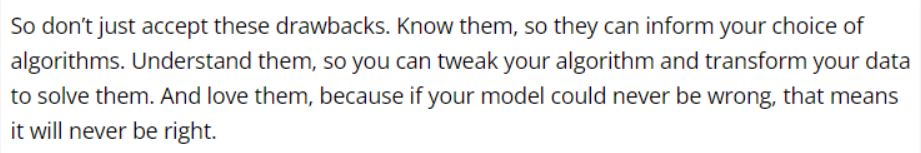


In [39]:
library(kernlab)
library(factoextra)
library(gridExtra)
library(grid)
library(ggfortify)
library(cluster)
library(dendextend)
library(ggpubr)
library(NbClust)
library(ggdendro)

In [3]:
data(spam)

In [5]:
head(spam)

,make,address,all,num3d,our,over,remove,internet,order,mail,⋯,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.00,0.64,0.64,0,0.32,0.00,0.00,0.00,0.00,0.00,⋯,0.00,0.000,0,0.778,0.000,0.000,3.756,61,278,spam
2,0.21,0.28,0.50,0,0.14,0.28,0.21,0.07,0.00,0.94,⋯,0.00,0.132,0,0.372,0.180,0.048,5.114,101,1028,spam
3,0.06,0.00,0.71,0,1.23,0.19,0.19,0.12,0.64,0.25,⋯,0.01,0.143,0,0.276,0.184,0.010,9.821,485,2259,spam
4,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.137,0,0.137,0.000,0.000,3.537,40,191,spam
5,0.00,0.00,0.00,0,0.63,0.00,0.31,0.63,0.31,0.63,⋯,0.00,0.135,0,0.135,0.000,0.000,3.537,40,191,spam
6,0.00,0.00,0.00,0,1.85,0.00,0.00,1.85,0.00,0.00,⋯,0.00,0.223,0,0.000,0.000,0.000,3.000,15,54,spam


In [4]:
spam <- spam[, -c(32, 34)]

In [5]:
spam_features <- spam[, 1:55]
log_data <- as.data.frame(log(spam_features+0.1))
spam_log <- cbind(log_data, spam[, 56, drop = FALSE])
scaled_data <- as.data.frame(scale(spam_features))
spam_scaled <- cbind(scaled_data, spam[, 56, drop = FALSE])

### PCA

In [8]:
pca <- prcomp(spam_features)
pca_scaled <- prcomp(scaled_data)
pca_log <- prcomp(log_data)

In [9]:
options(repr.plot.width = 13, repr.plot.height = 8)

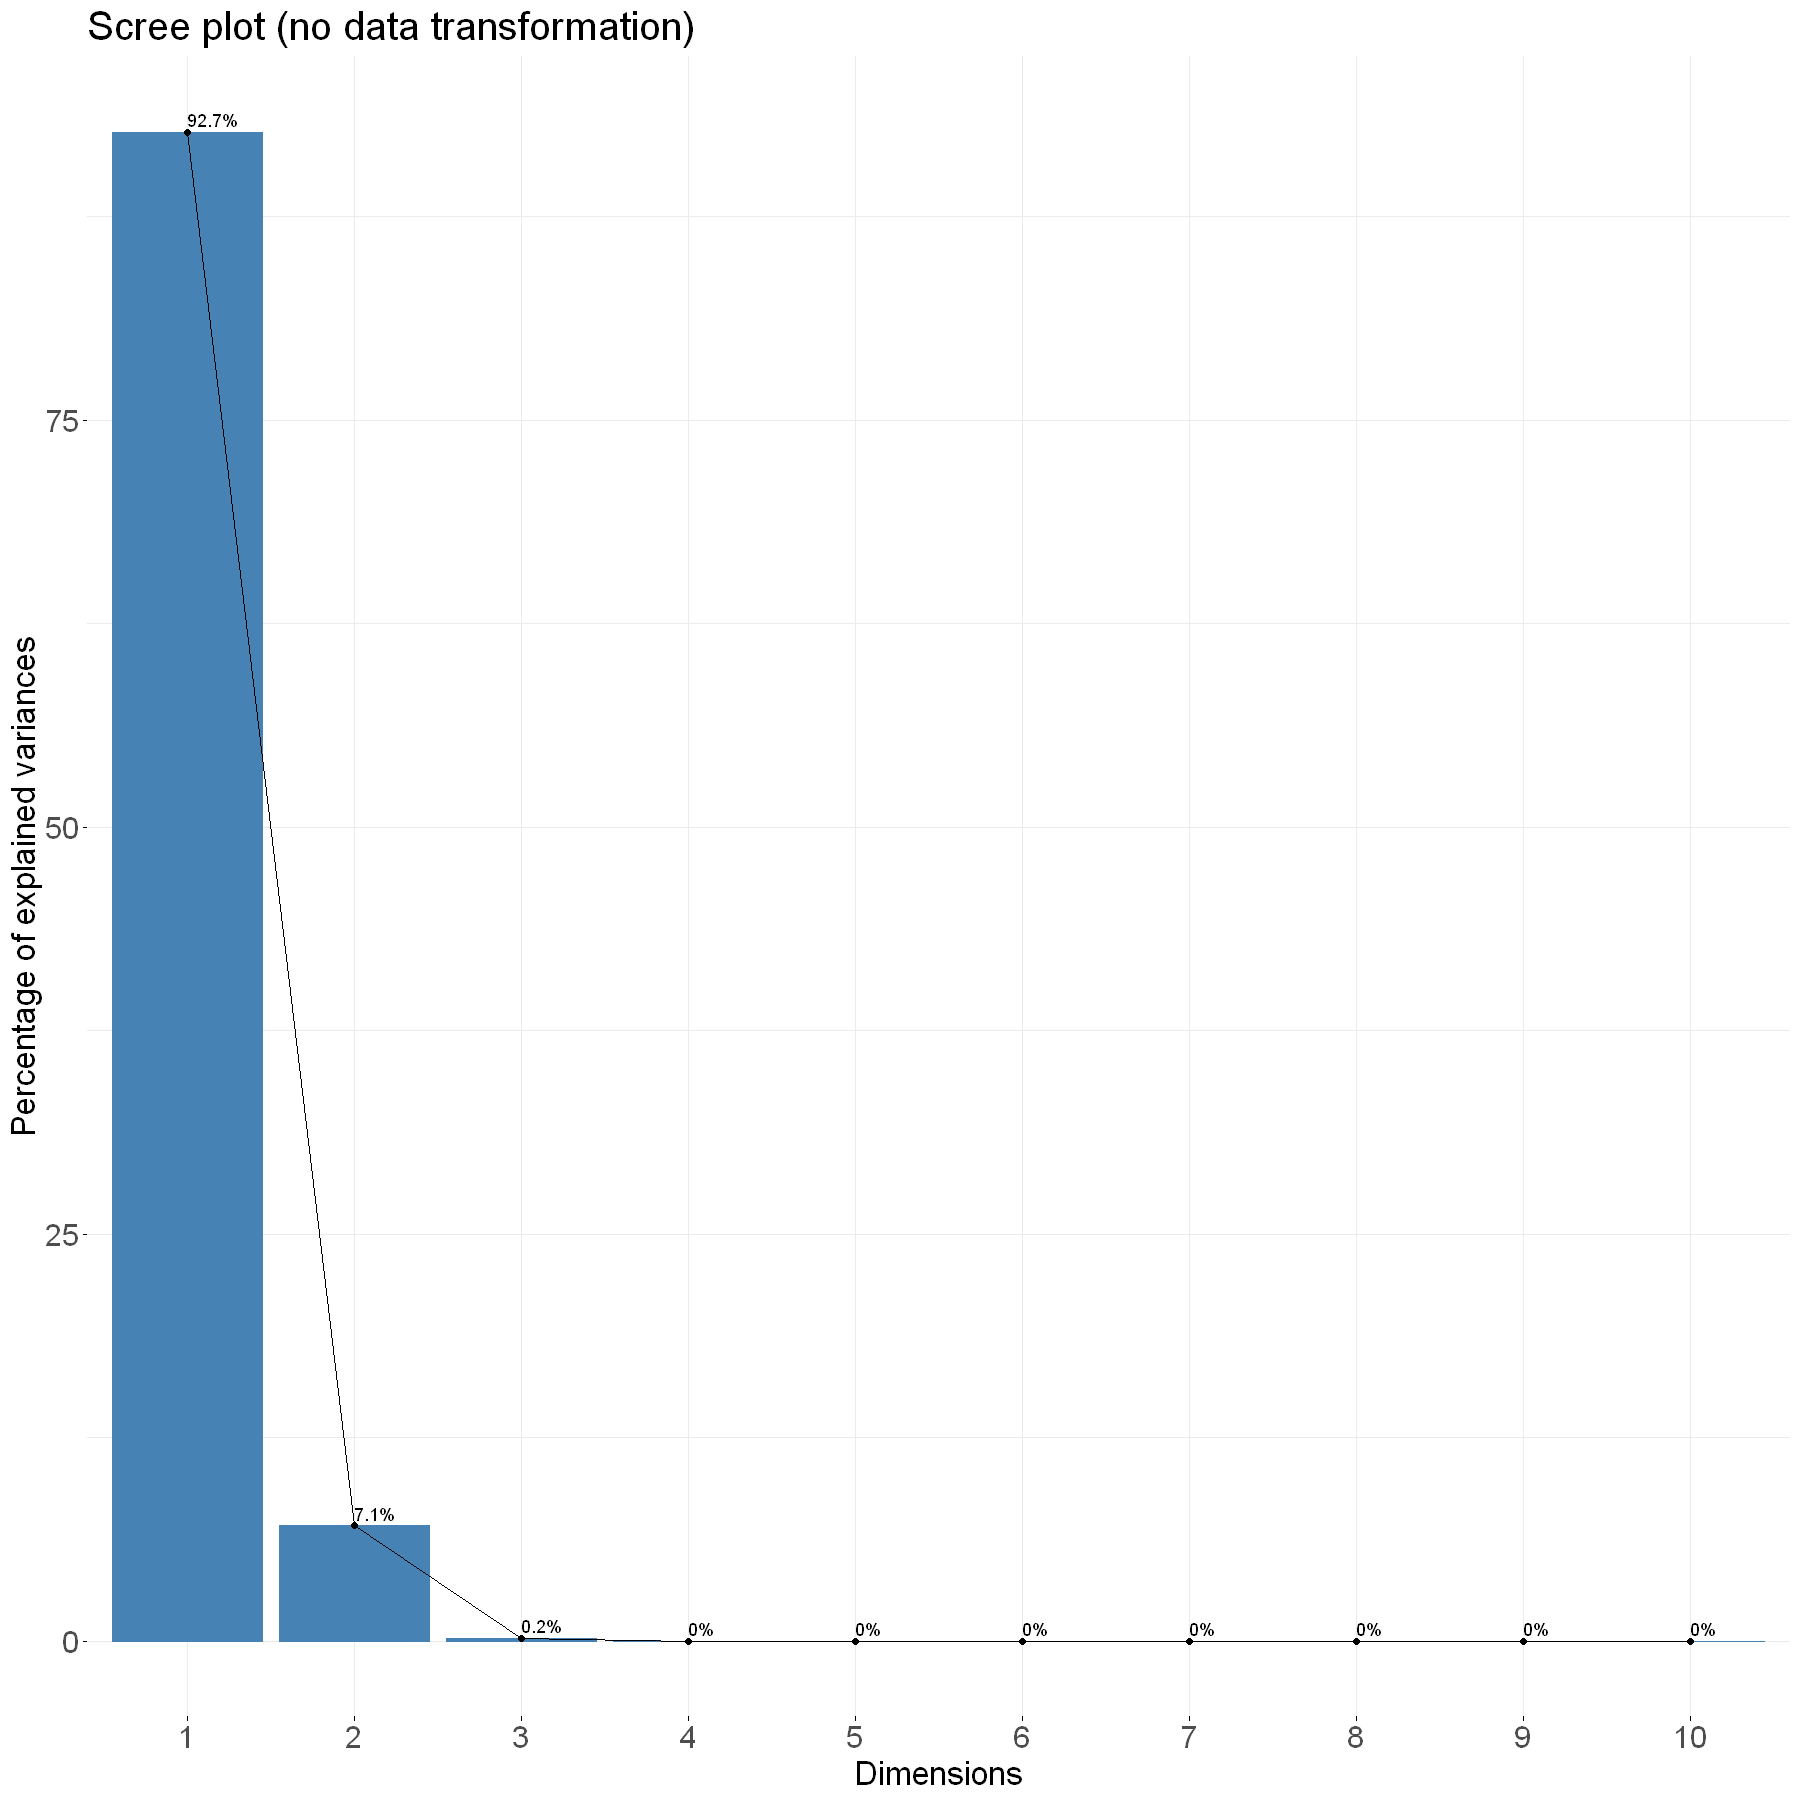

In [32]:
fviz_eig(pca, addlabels=TRUE) + 
    ggtitle("Scree plot (no data transformation)") +
    theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))

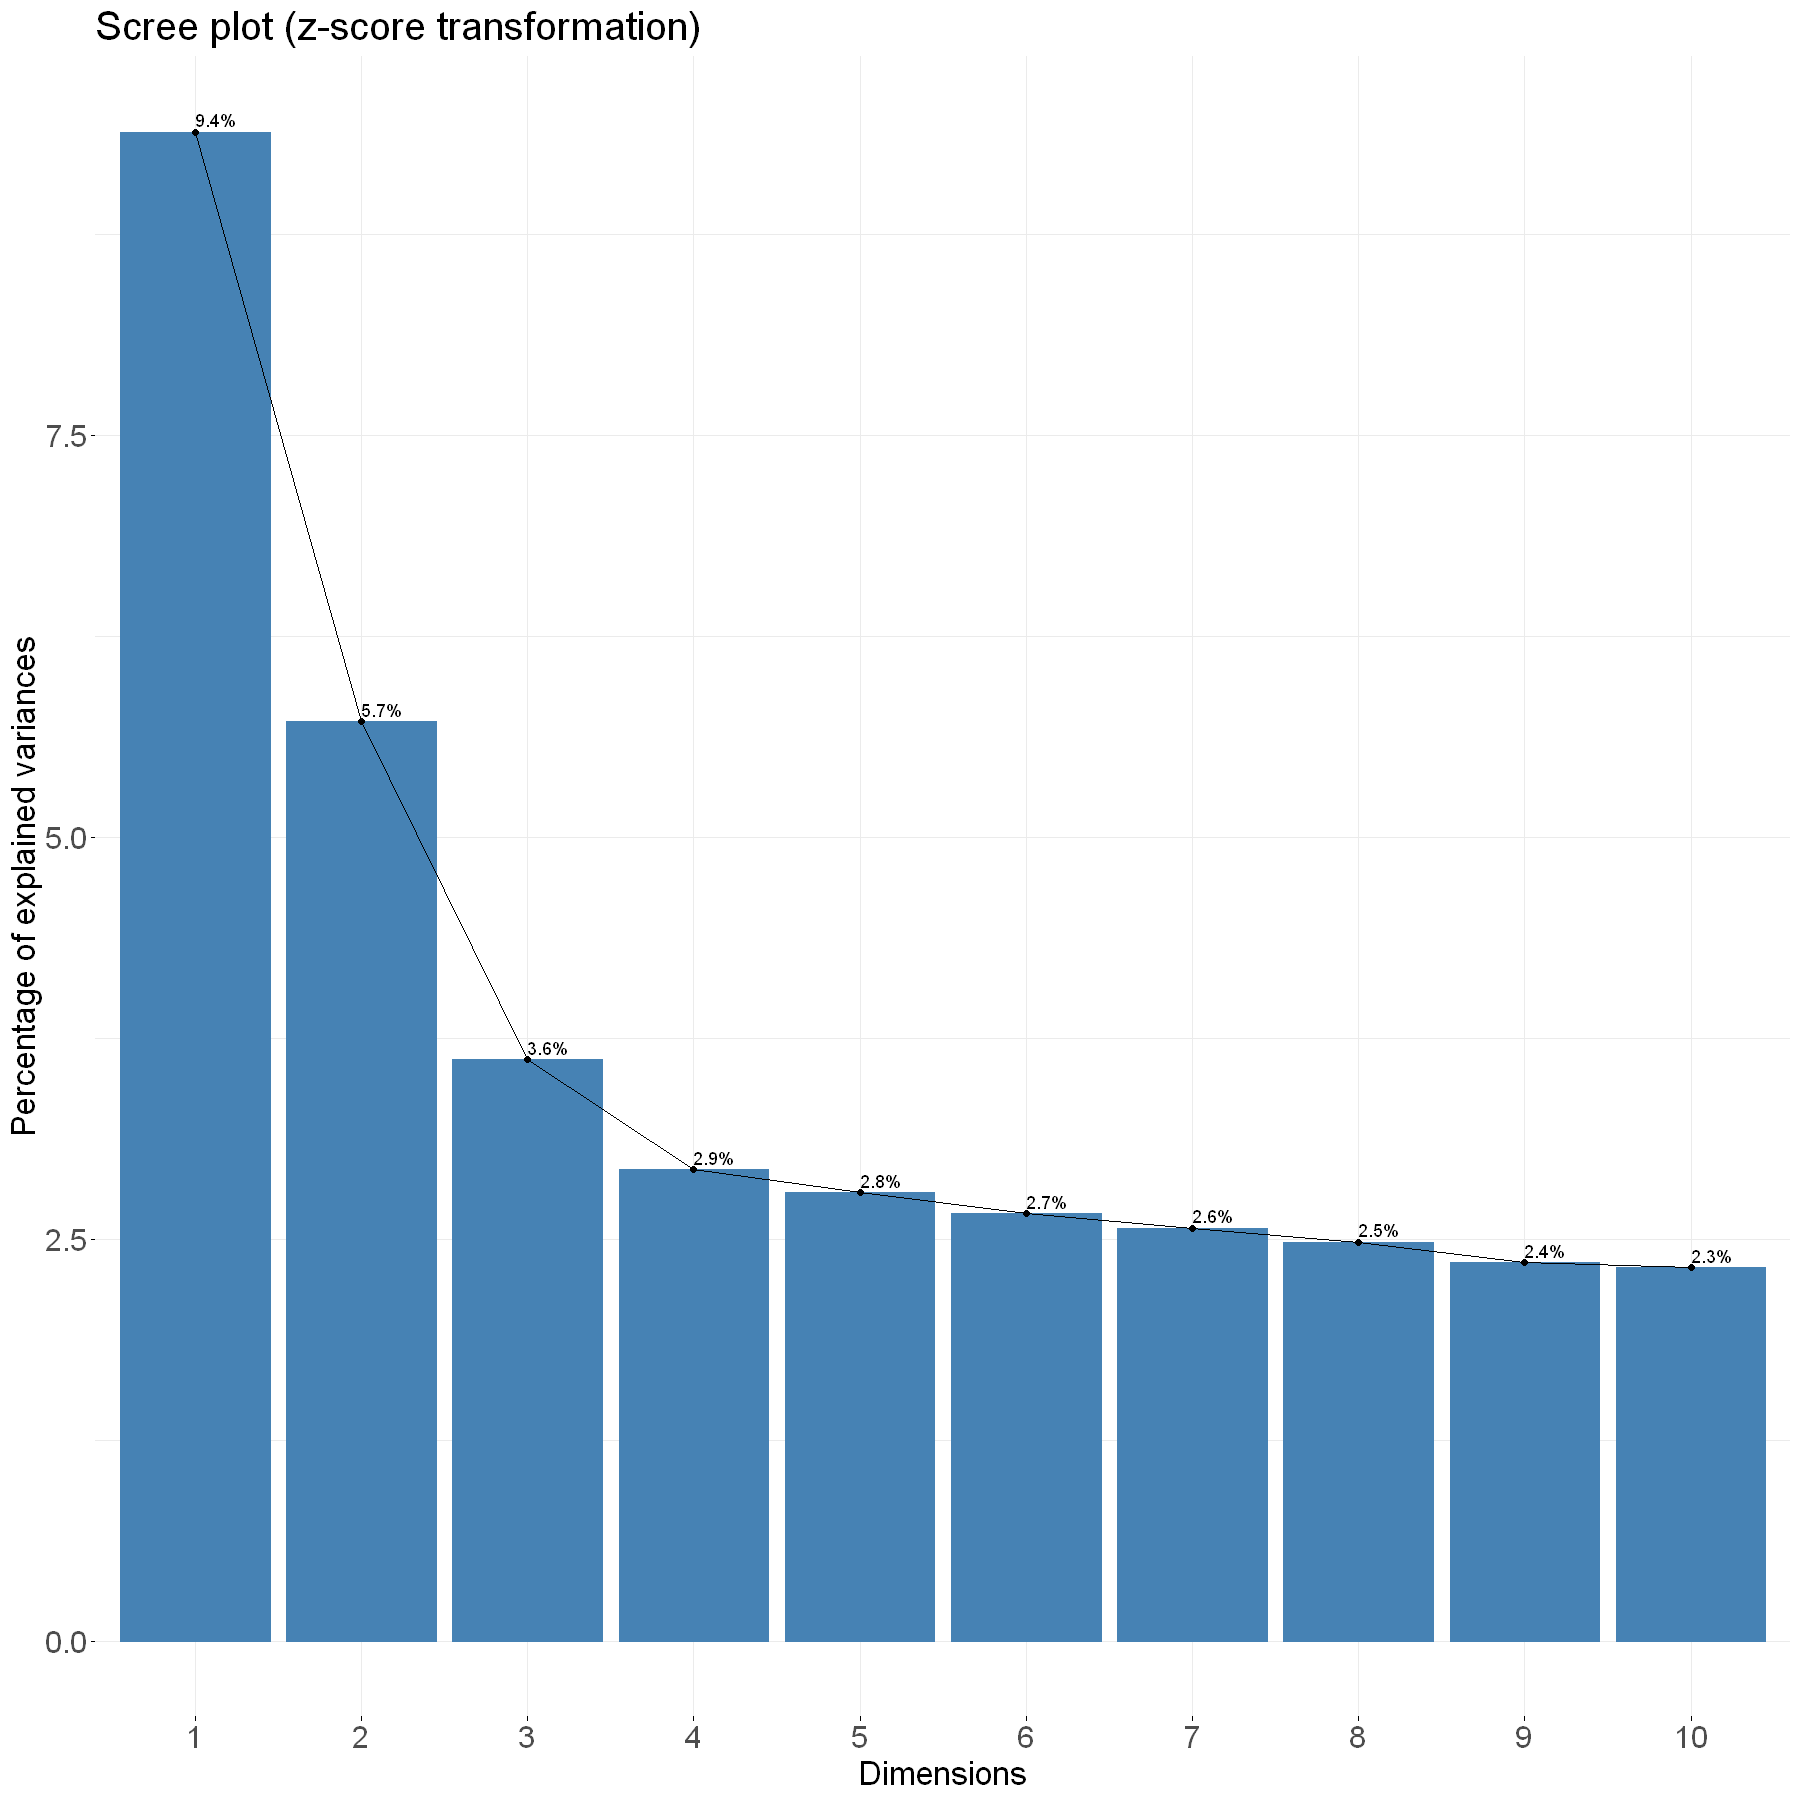

In [34]:
fviz_eig(pca_scaled, addlabels=TRUE) + 
    ggtitle("Scree plot (z-score transformation)") +
    theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))

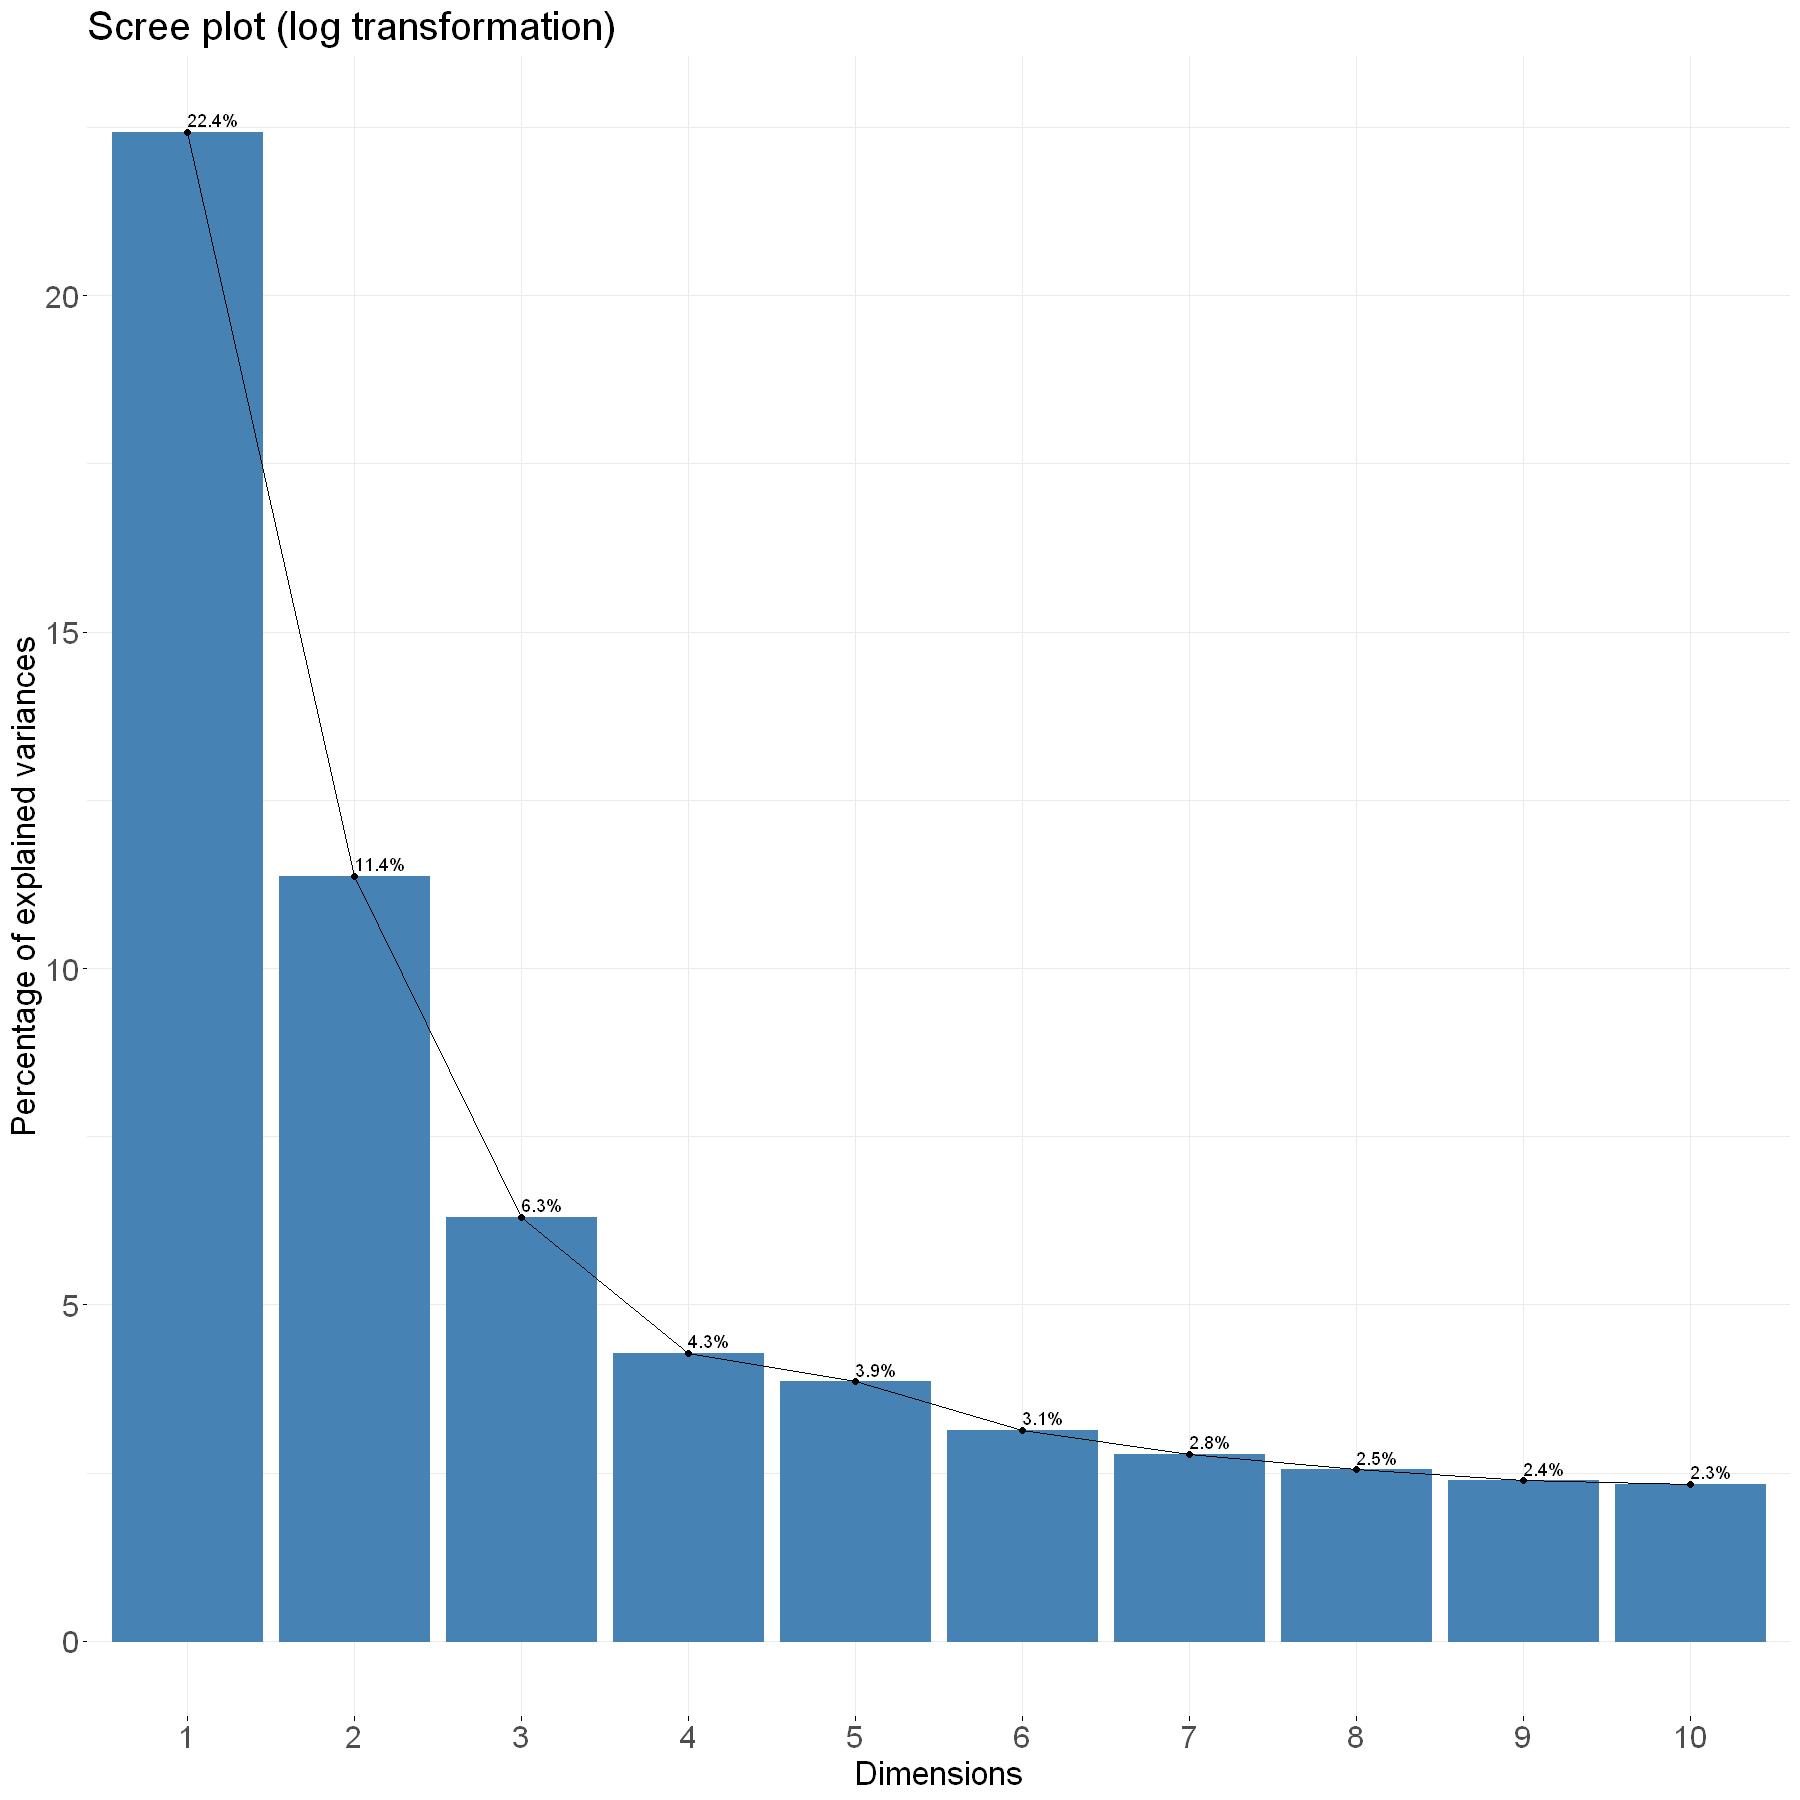

In [36]:
fviz_eig(pca_log, addlabels=TRUE) + 
    ggtitle("Scree plot (log transformation)") +
    theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))

In [12]:
options(repr.plot.width = 15, repr.plot.height = 15)

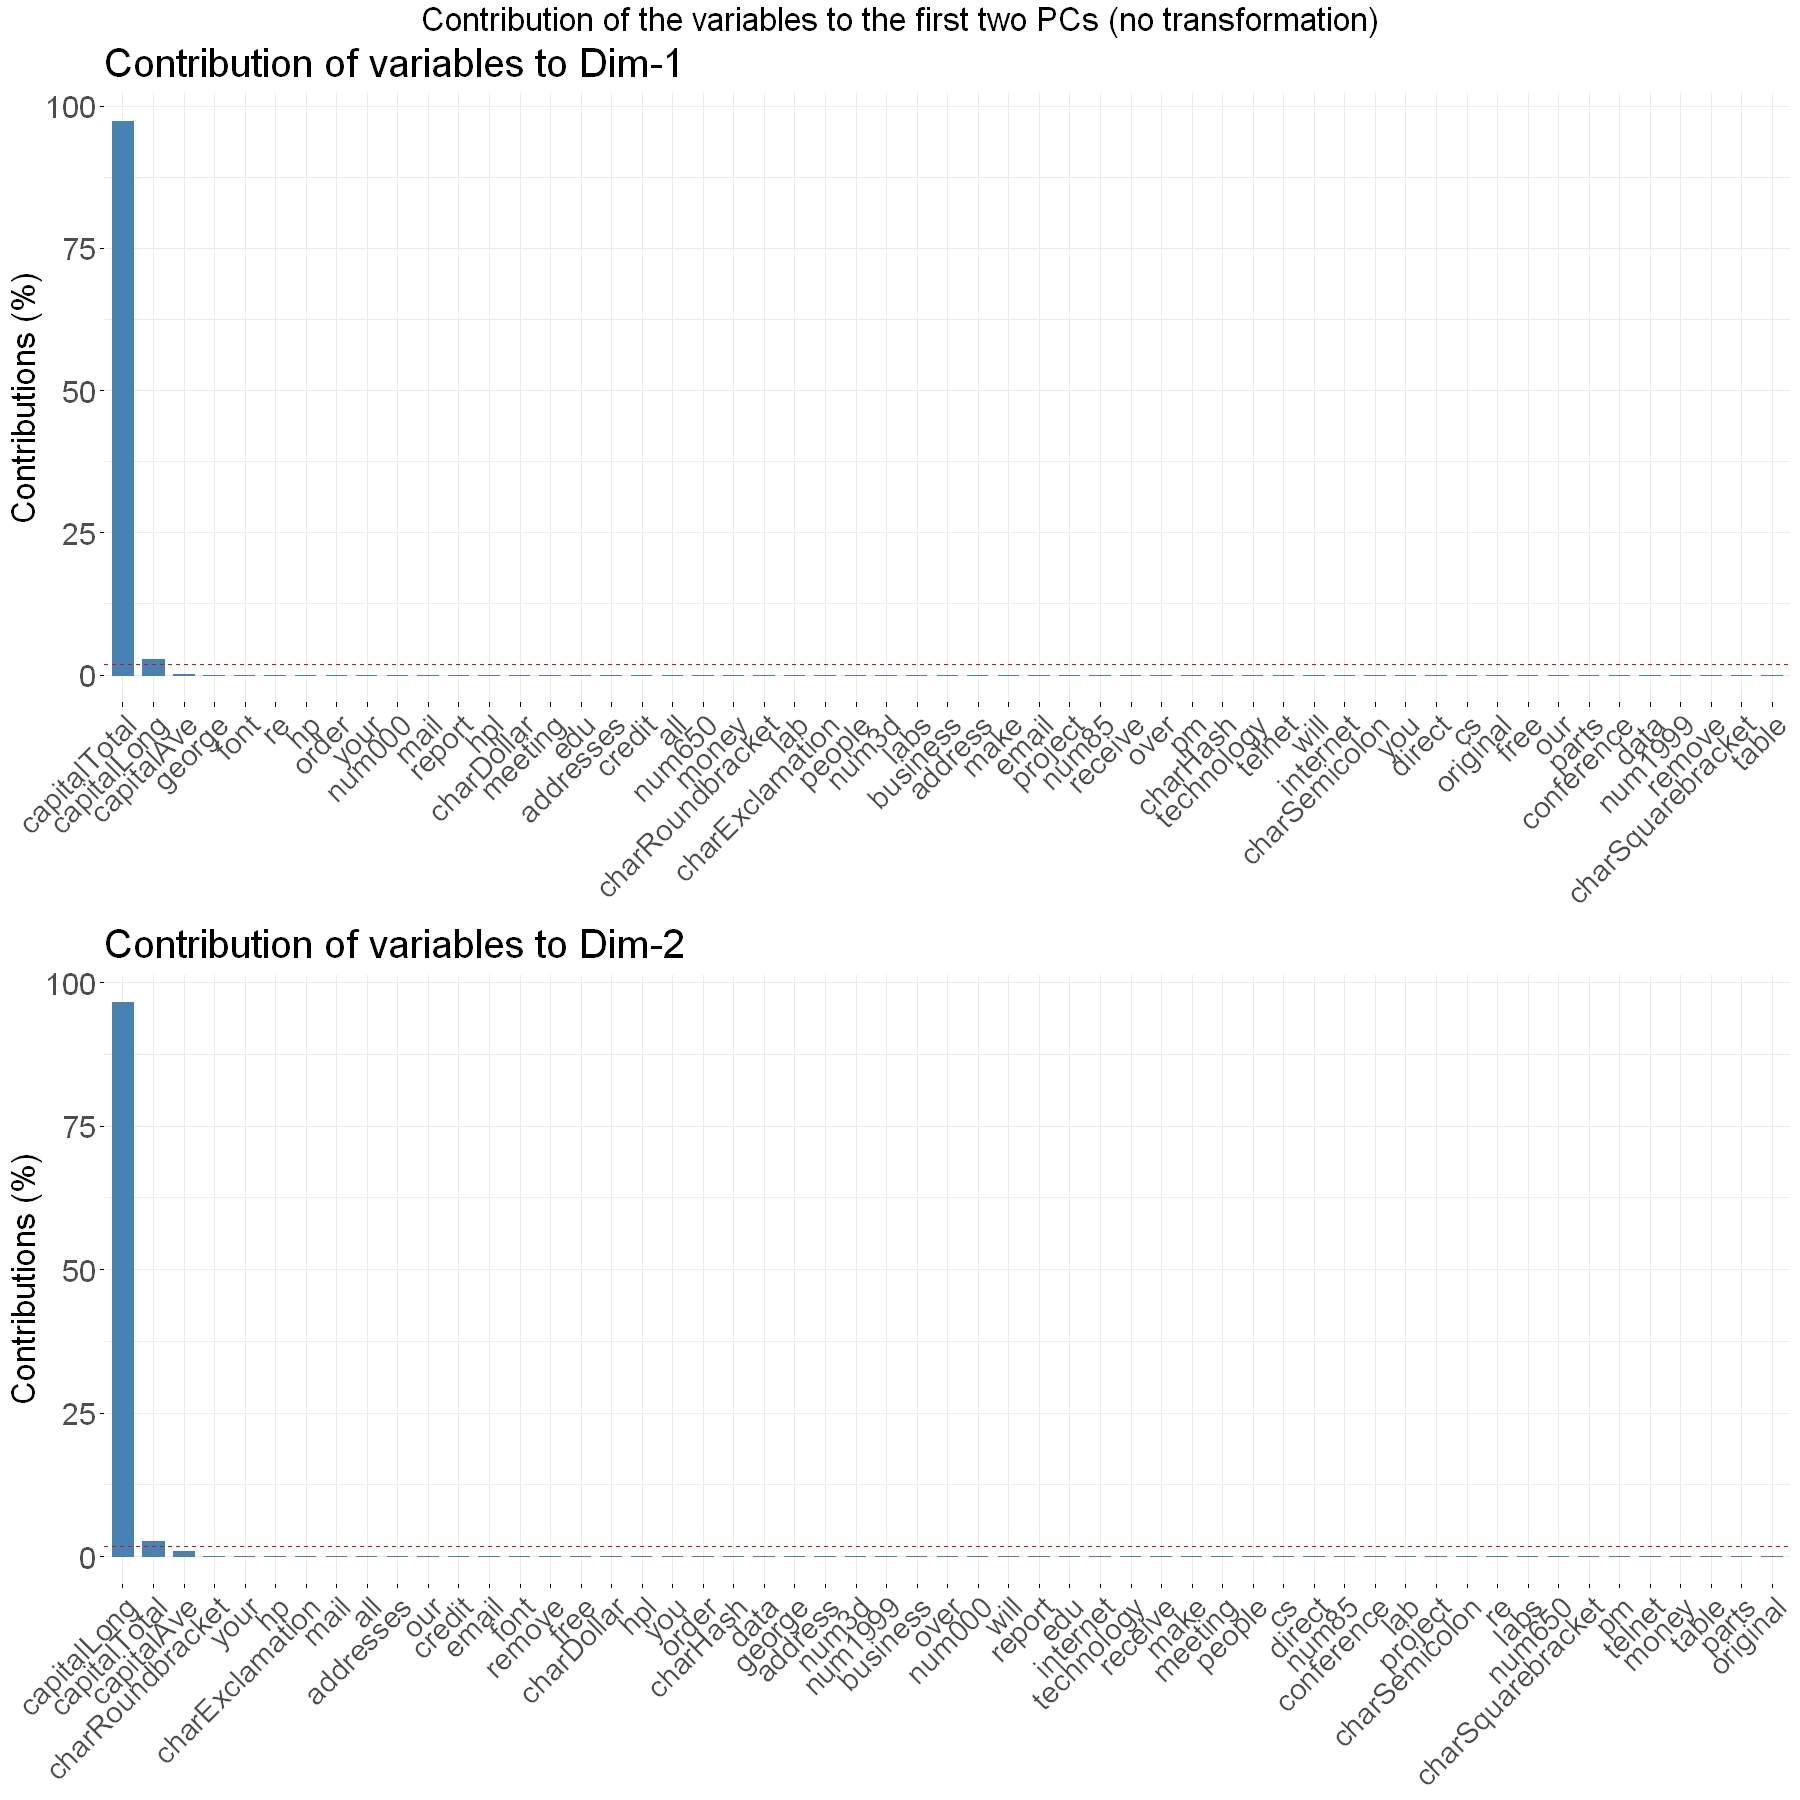

In [38]:
var1 <- fviz_contrib(pca, choice="var", axes=1) +
    theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))
var2 <- fviz_contrib(pca, choice="var", axes=2) +
    theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))
grid.arrange(var1, var2, ncol=1, top=textGrob("Contribution of the variables to the first two PCs (no transformation)", gp=gpar(fontsize=20)))

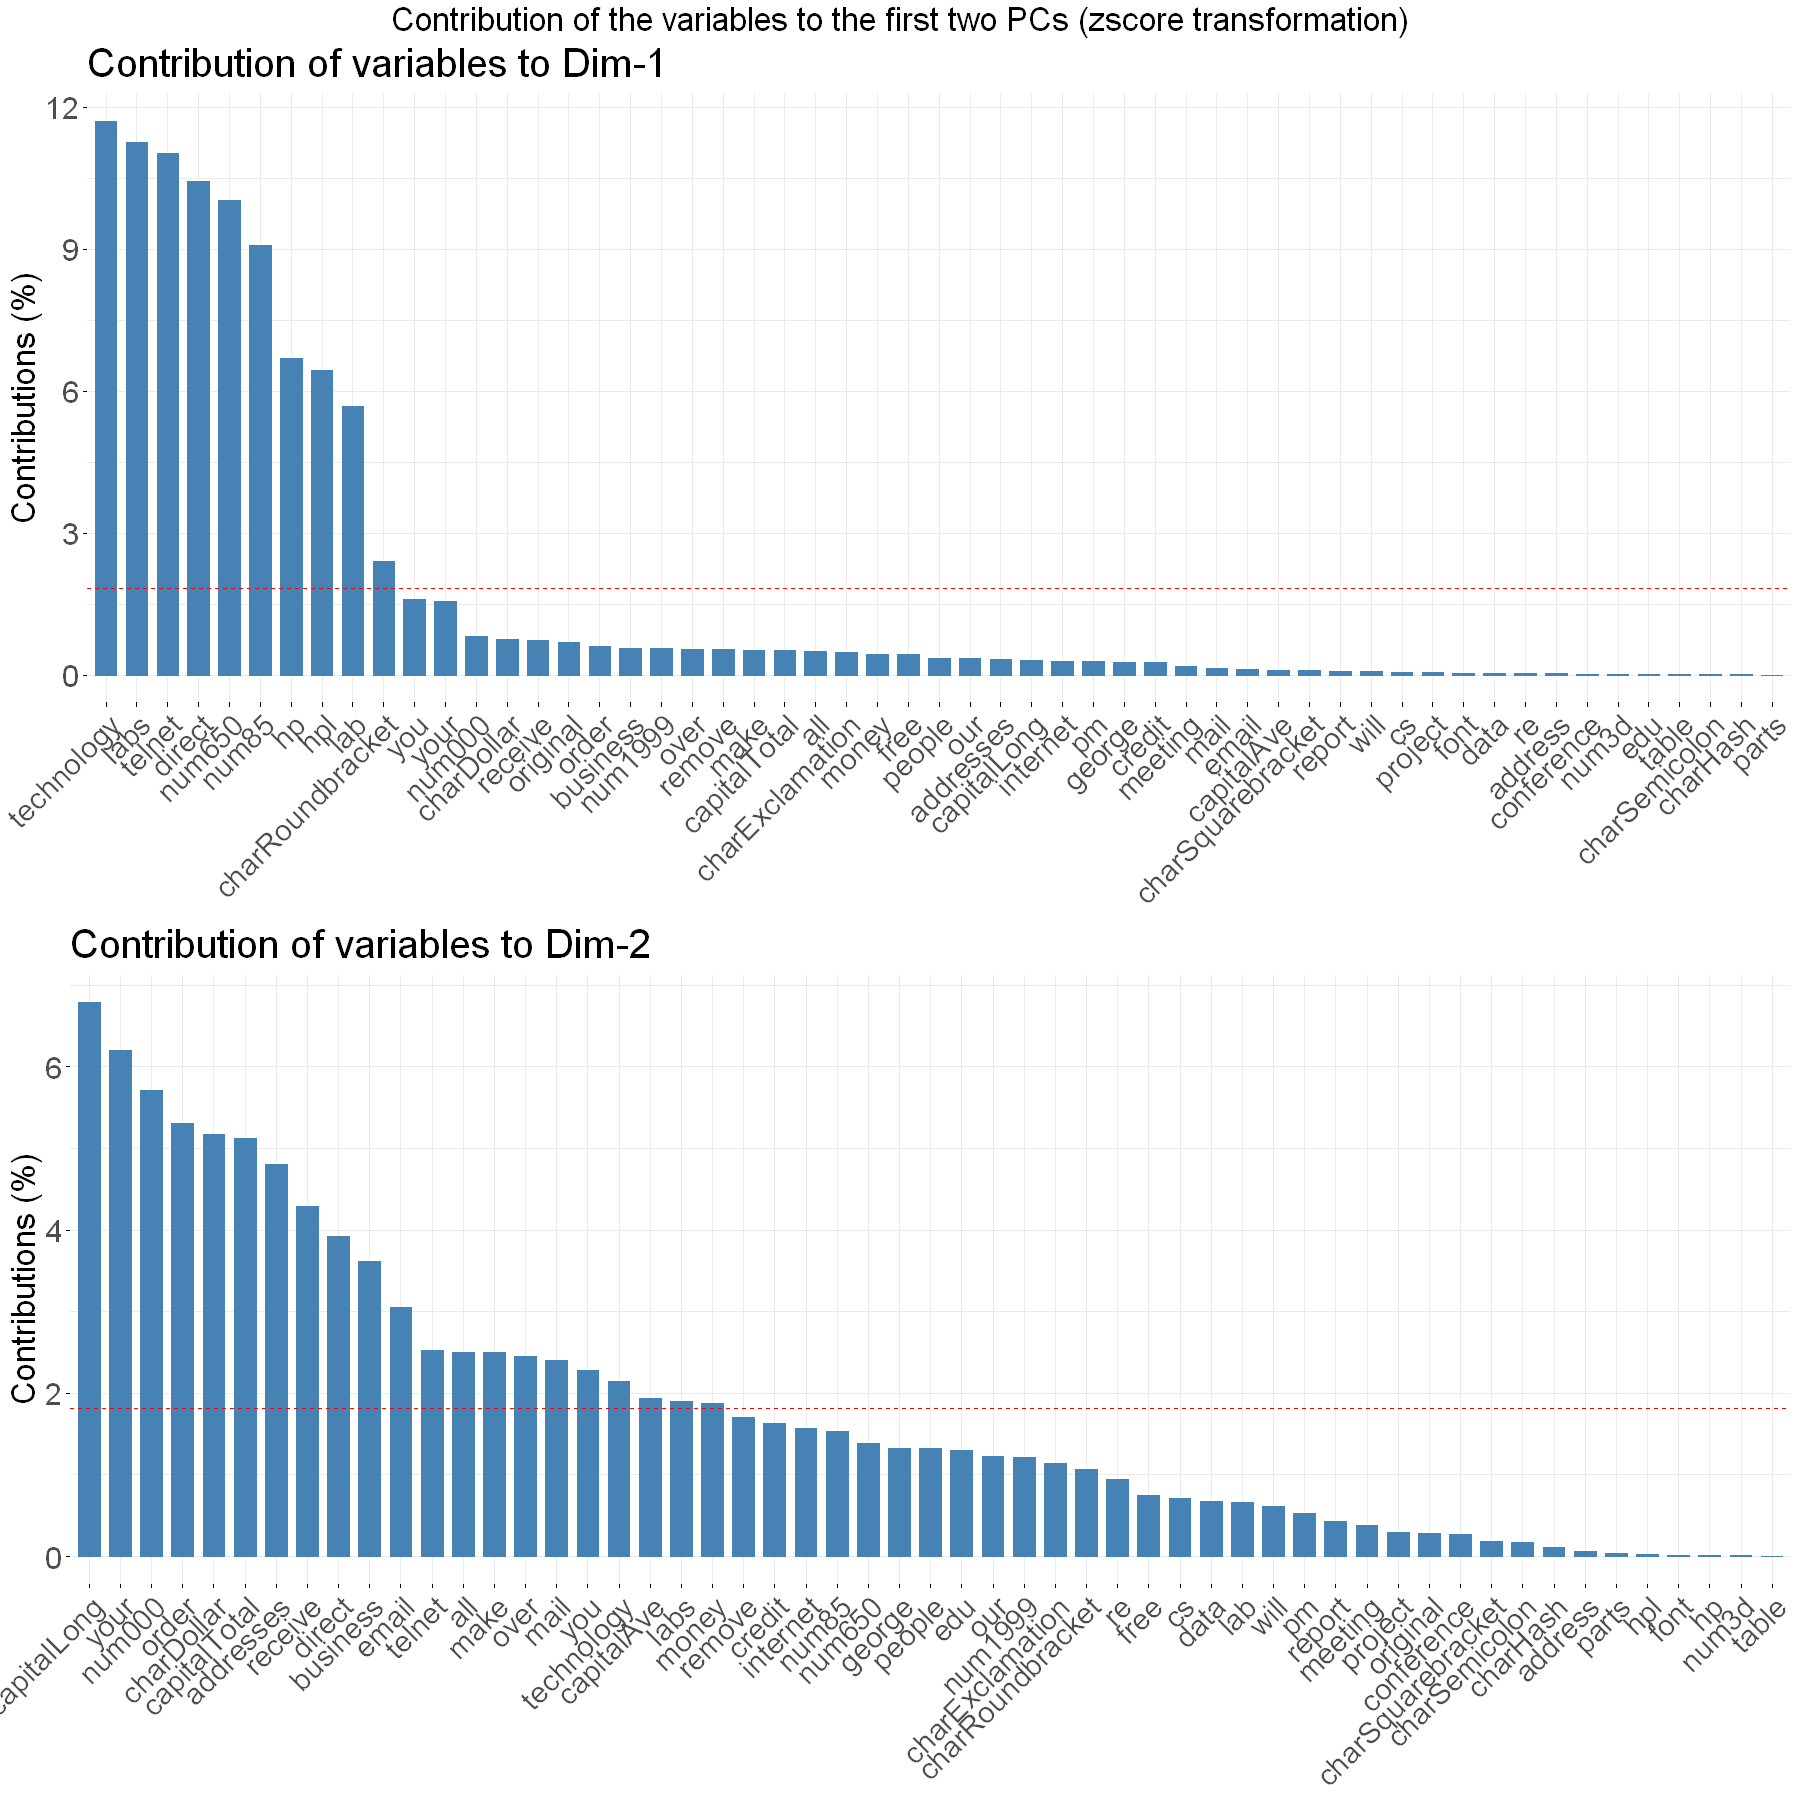

In [40]:
var1 <- fviz_contrib(pca_scaled, choice="var", axes=1) +
    theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))
var2 <- fviz_contrib(pca_scaled, choice="var", axes=2) +
    theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))
grid.arrange(var1, var2, ncol=1, top=textGrob("Contribution of the variables to the first two PCs (zscore transformation)", gp=gpar(fontsize=20)))

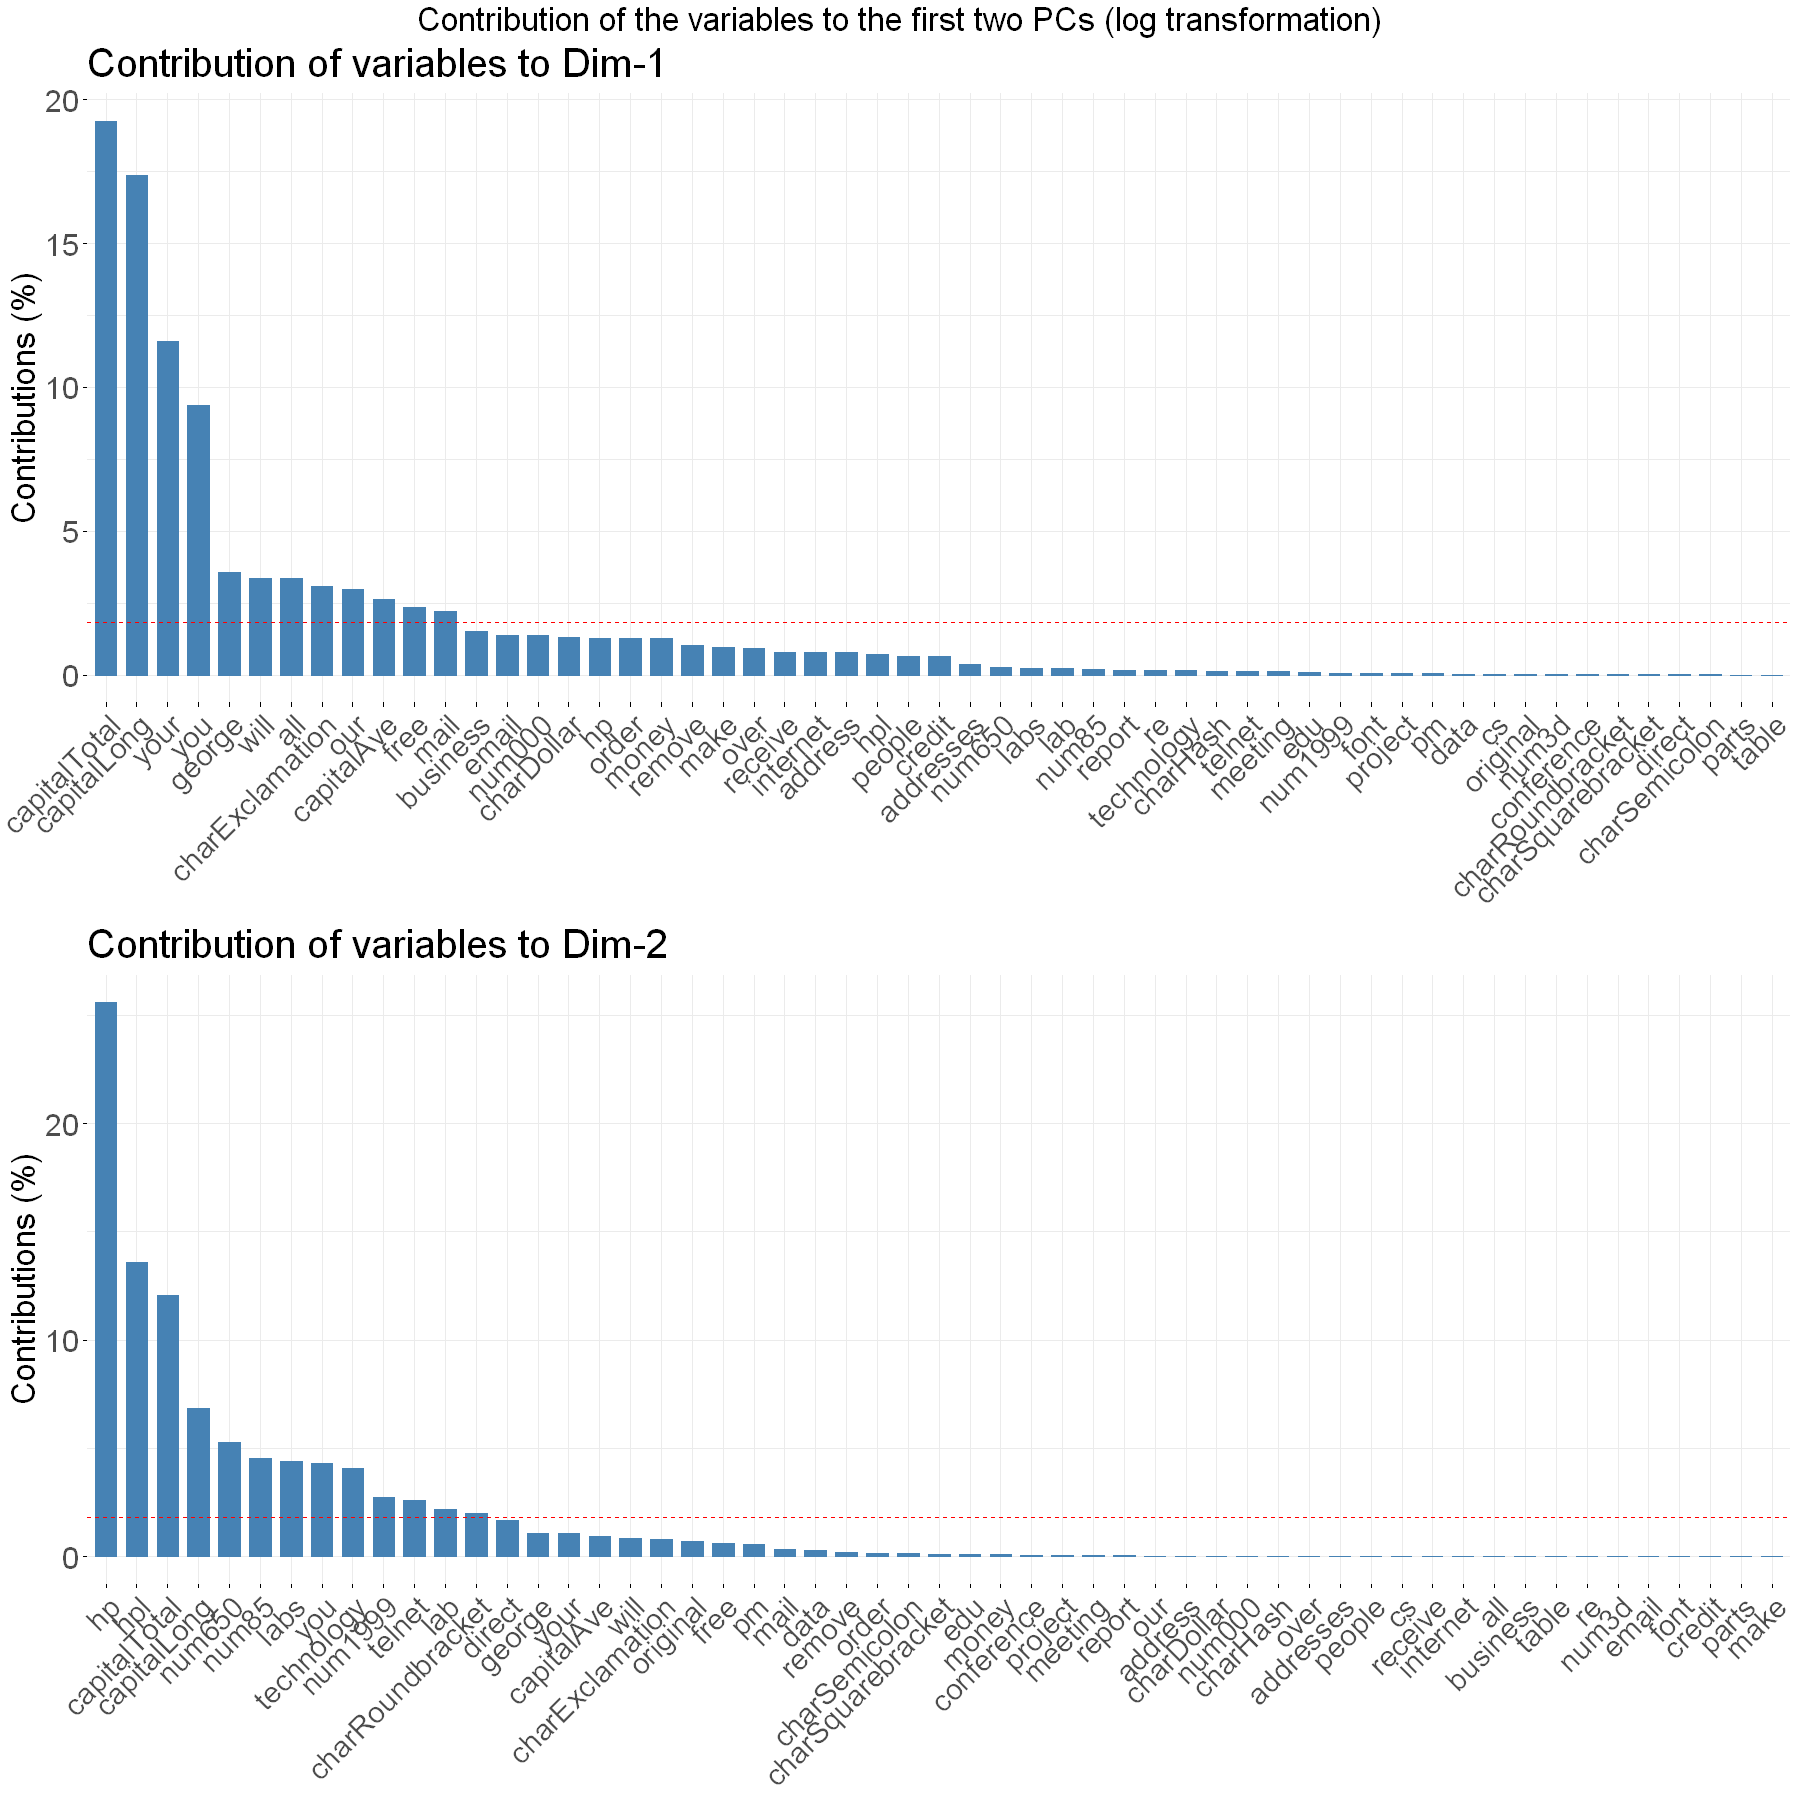

In [44]:
var1 <- fviz_contrib(pca_log, choice="var", axes=1) +
    theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))
var2 <- fviz_contrib(pca_log, choice="var", axes=2) +
    theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))
grid.arrange(var1, var2, ncol=1, top=textGrob("Contribution of the variables to the first two PCs (log transformation)", gp=gpar(fontsize=20)))

In [17]:
var_proportion <- cumsum(summary(pca_scaled)$importance[2,])
as.data.frame(var_proportion)

,var_proportion
,<dbl>
PC1,0.09385
PC2,0.15104
PC3,0.18721
PC4,0.21653
PC5,0.24443
PC6,0.27102
PC7,0.29672
PC8,0.32155
PC9,0.34509


In [18]:
var_proportion <- cumsum(summary(pca_log)$importance[2,])
as.data.frame(var_proportion)

,var_proportion
,<dbl>
PC1,0.22433
PC2,0.33805
PC3,0.40110
PC4,0.44389
PC5,0.48244
PC6,0.51381
PC7,0.54157
PC8,0.56704
PC9,0.59087


In [10]:
sd_scaled <- mean(pca_scaled$sdev)
sd_log <- mean(pca_log$sdev)

In [11]:
scaled_reject <- which(pca_scaled$sdev < sd_scaled)
log_reject <- which(pca_log$sdev < sd_log)

In [12]:
pca_scores_scaled <- data.frame(pca_scaled$x[, -scaled_reject])
pca_scores_log <- data.frame(pca_log$x[, -log_reject])

In [88]:
clust_plot_scaled <- fviz_nbclust(spam_scaled[, -56], FUNcluster = kmeans, method = "silhouette", nstart=10) +
    theme(
        plot.title = element_text(size = 18),
        axis.title = element_text(size = 16),         
        axis.text.x = element_text(size = 14),        
        axis.text.y = element_text(size = 14)) +
    ggtitle("Z-score transformation, no PCA")
clust_plot_log <- fviz_nbclust(spam_log[, -56], FUNcluster = kmeans, method = "silhouette", nstart=10) +
    theme(
        plot.title = element_text(size = 18),
        axis.title = element_text(size = 16),         
        axis.text.x = element_text(size = 14),        
        axis.text.y = element_text(size = 14)) +
    ggtitle("Log transformation, no PCA")

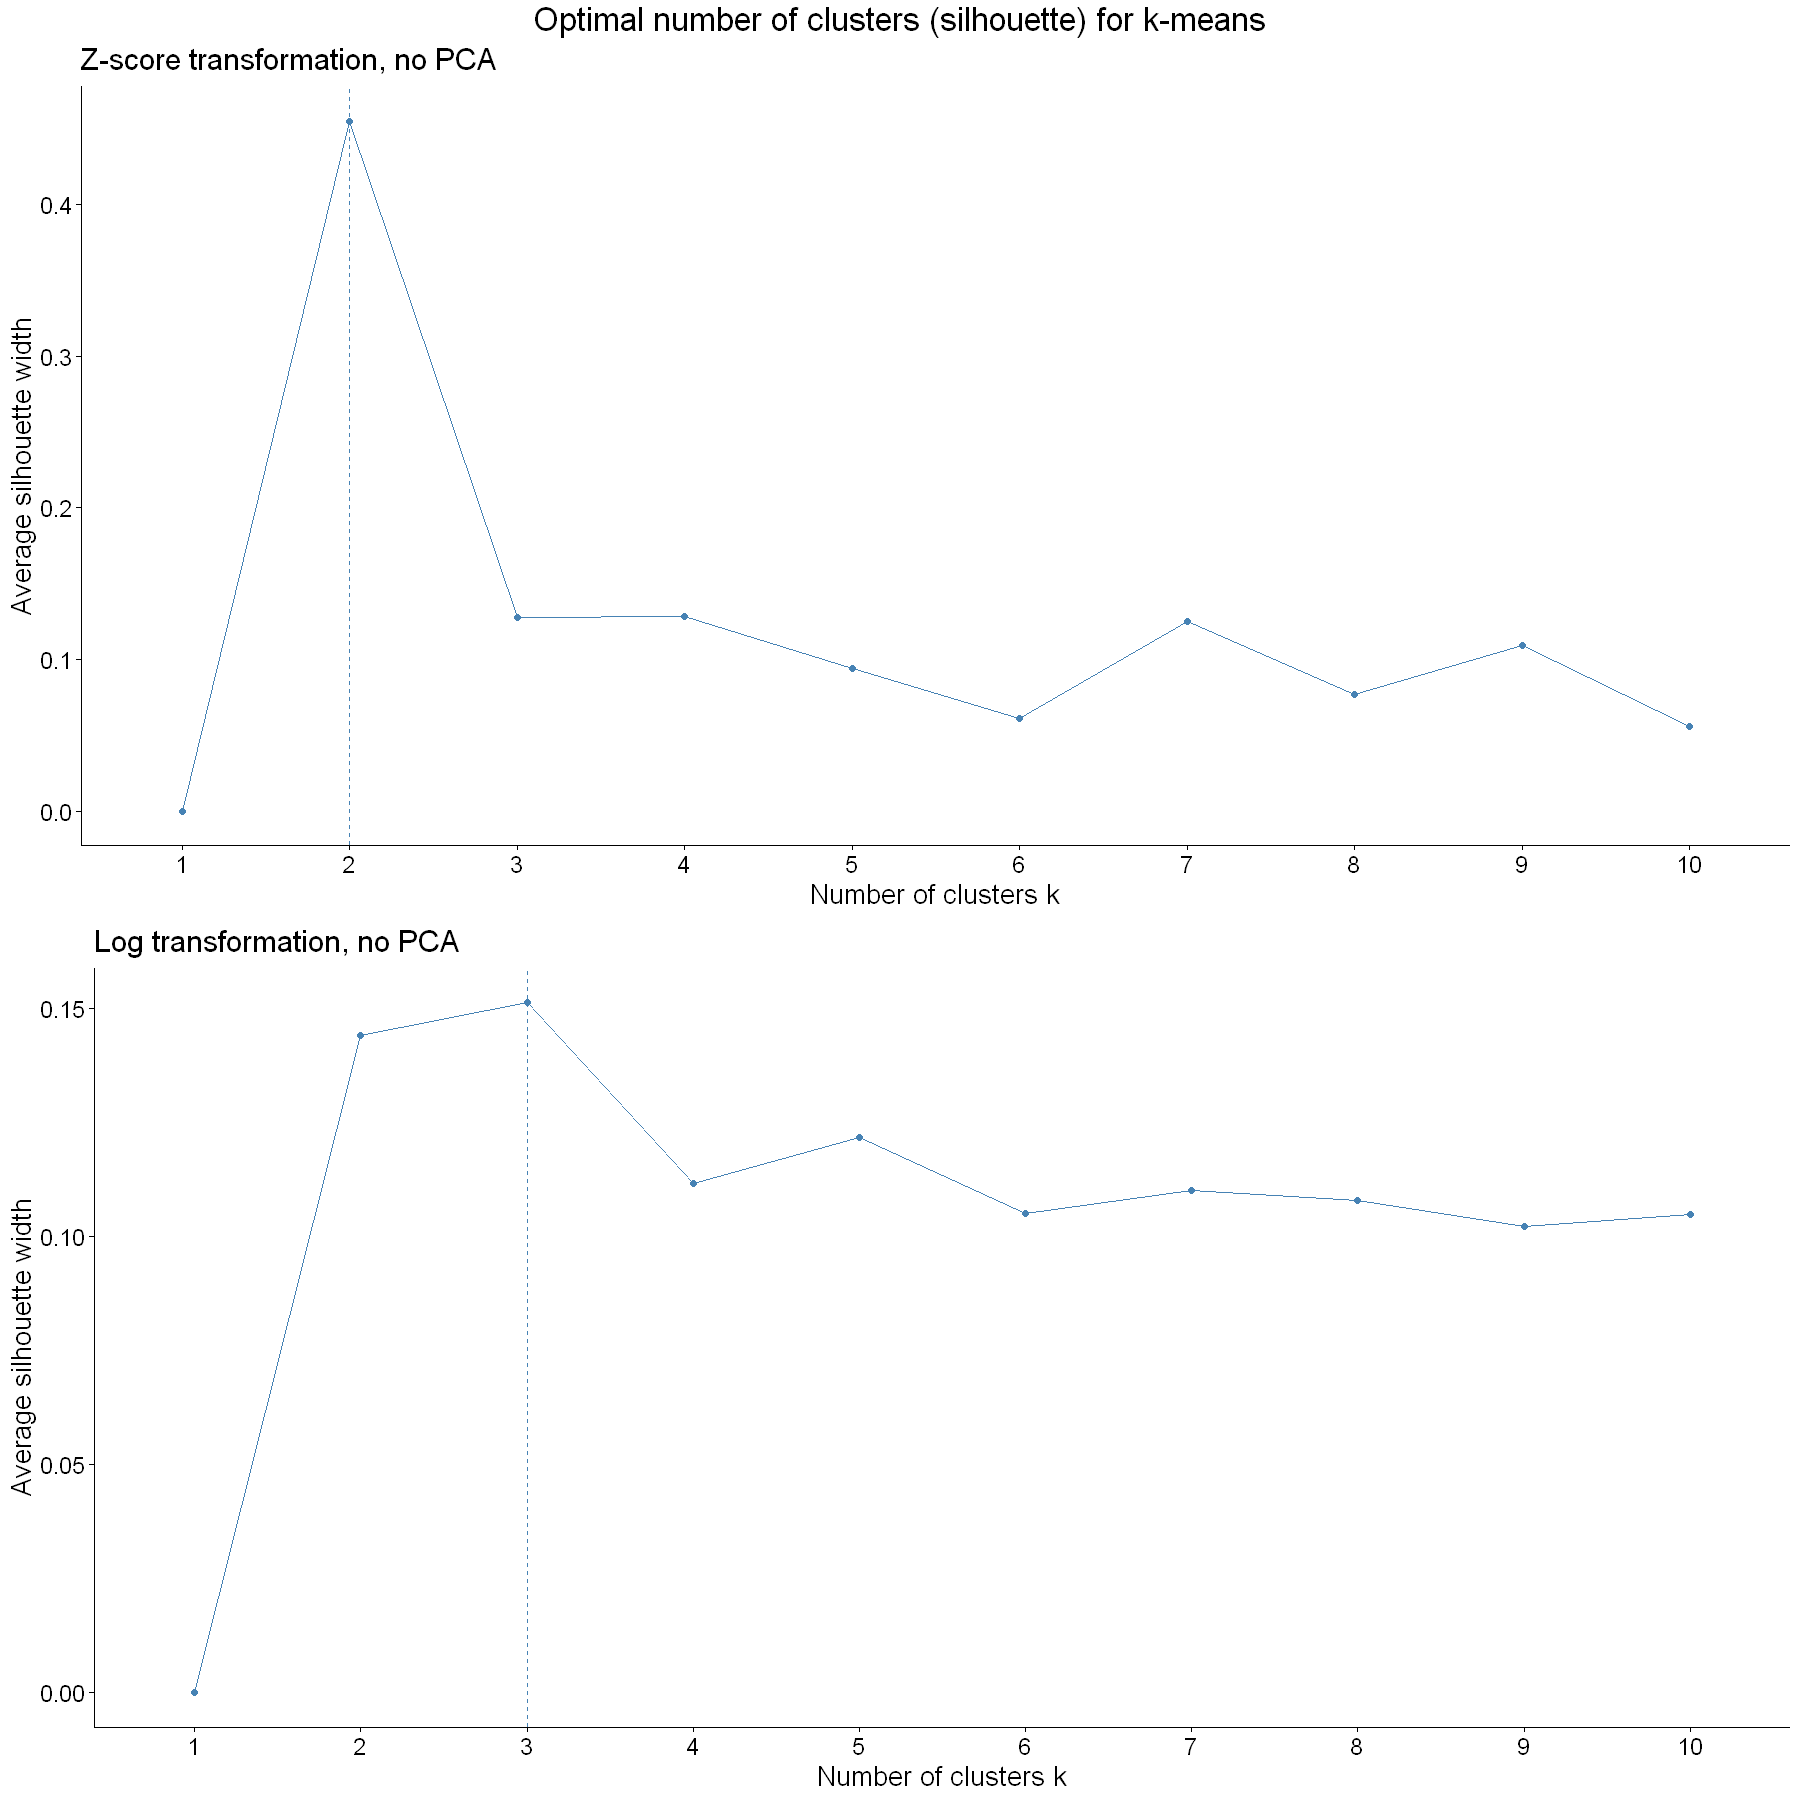

In [95]:
options(repr.plot.width = 15, repr.plot.height = 15)
grid.arrange(clust_plot_scaled, clust_plot_log, ncol=1, top=textGrob("Optimal number of clusters (silhouette) for k-means", gp=gpar(fontsize=20)))

In [102]:
clust_plot_scaled_pca <- fviz_nbclust(pca_scores_scaled, FUNcluster = kmeans, method = "silhouette", nstart=10) +
    theme(
        plot.title = element_text(size = 18),
        axis.title = element_text(size = 16),         
        axis.text.x = element_text(size = 14),        
        axis.text.y = element_text(size = 14)) +
    ggtitle("Z-score transformation + PCA")
clust_plot_log_pca <- fviz_nbclust(pca_scores_log, FUNcluster = kmeans, method = "silhouette", nstart=10) +
    theme(
        plot.title = element_text(size = 18),
        axis.title = element_text(size = 16),         
        axis.text.x = element_text(size = 14),        
        axis.text.y = element_text(size = 14)) +
    ggtitle("Log transformation + PCA")

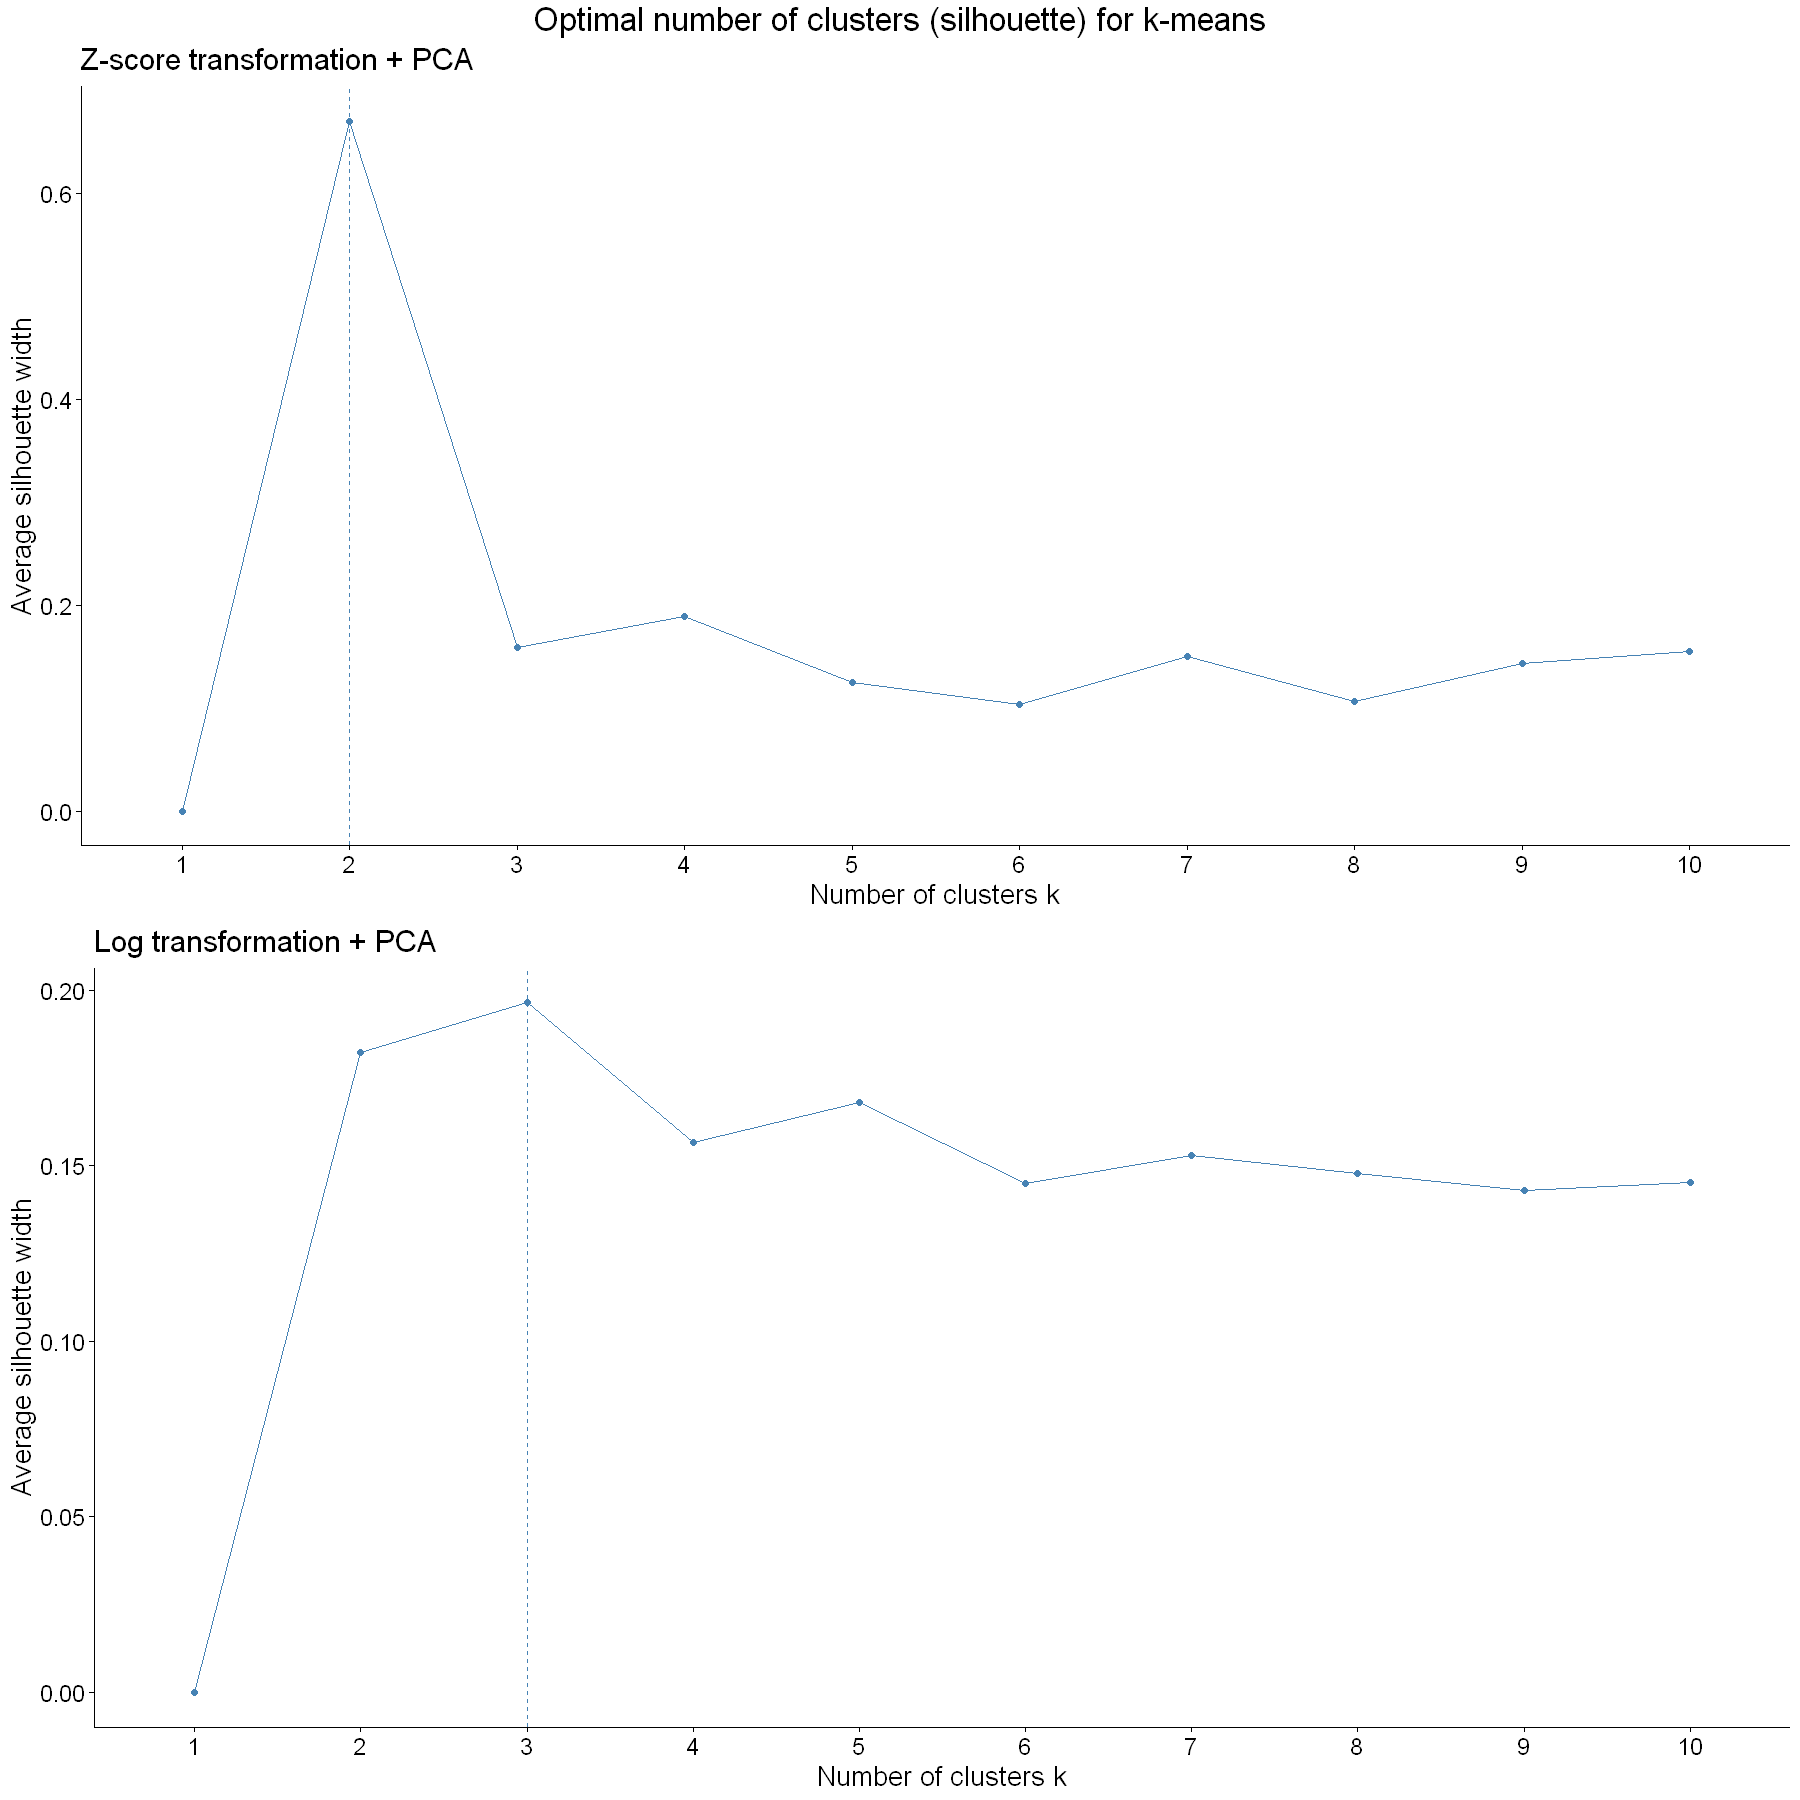

In [103]:
options(repr.plot.width = 15, repr.plot.height = 15)
grid.arrange(clust_plot_scaled_pca, clust_plot_log_pca, ncol=1, top=textGrob("Optimal number of clusters (silhouette) for k-means", gp=gpar(fontsize=20)))

In [104]:
clust_plot_scaled <- fviz_nbclust(spam_scaled[, -56], FUNcluster = cluster::pam, method = "silhouette") +
    theme(
        plot.title = element_text(size = 18),
        axis.title = element_text(size = 16),         
        axis.text.x = element_text(size = 14),        
        axis.text.y = element_text(size = 14)) +
    ggtitle("Z-score transformation, no PCA")
clust_plot_log <- fviz_nbclust(spam_log[, -56], FUNcluster = cluster::pam, method = "silhouette") +
    theme(
        plot.title = element_text(size = 18),
        axis.title = element_text(size = 16),         
        axis.text.x = element_text(size = 14),        
        axis.text.y = element_text(size = 14)) +
    ggtitle("Log transformation, no PCA")

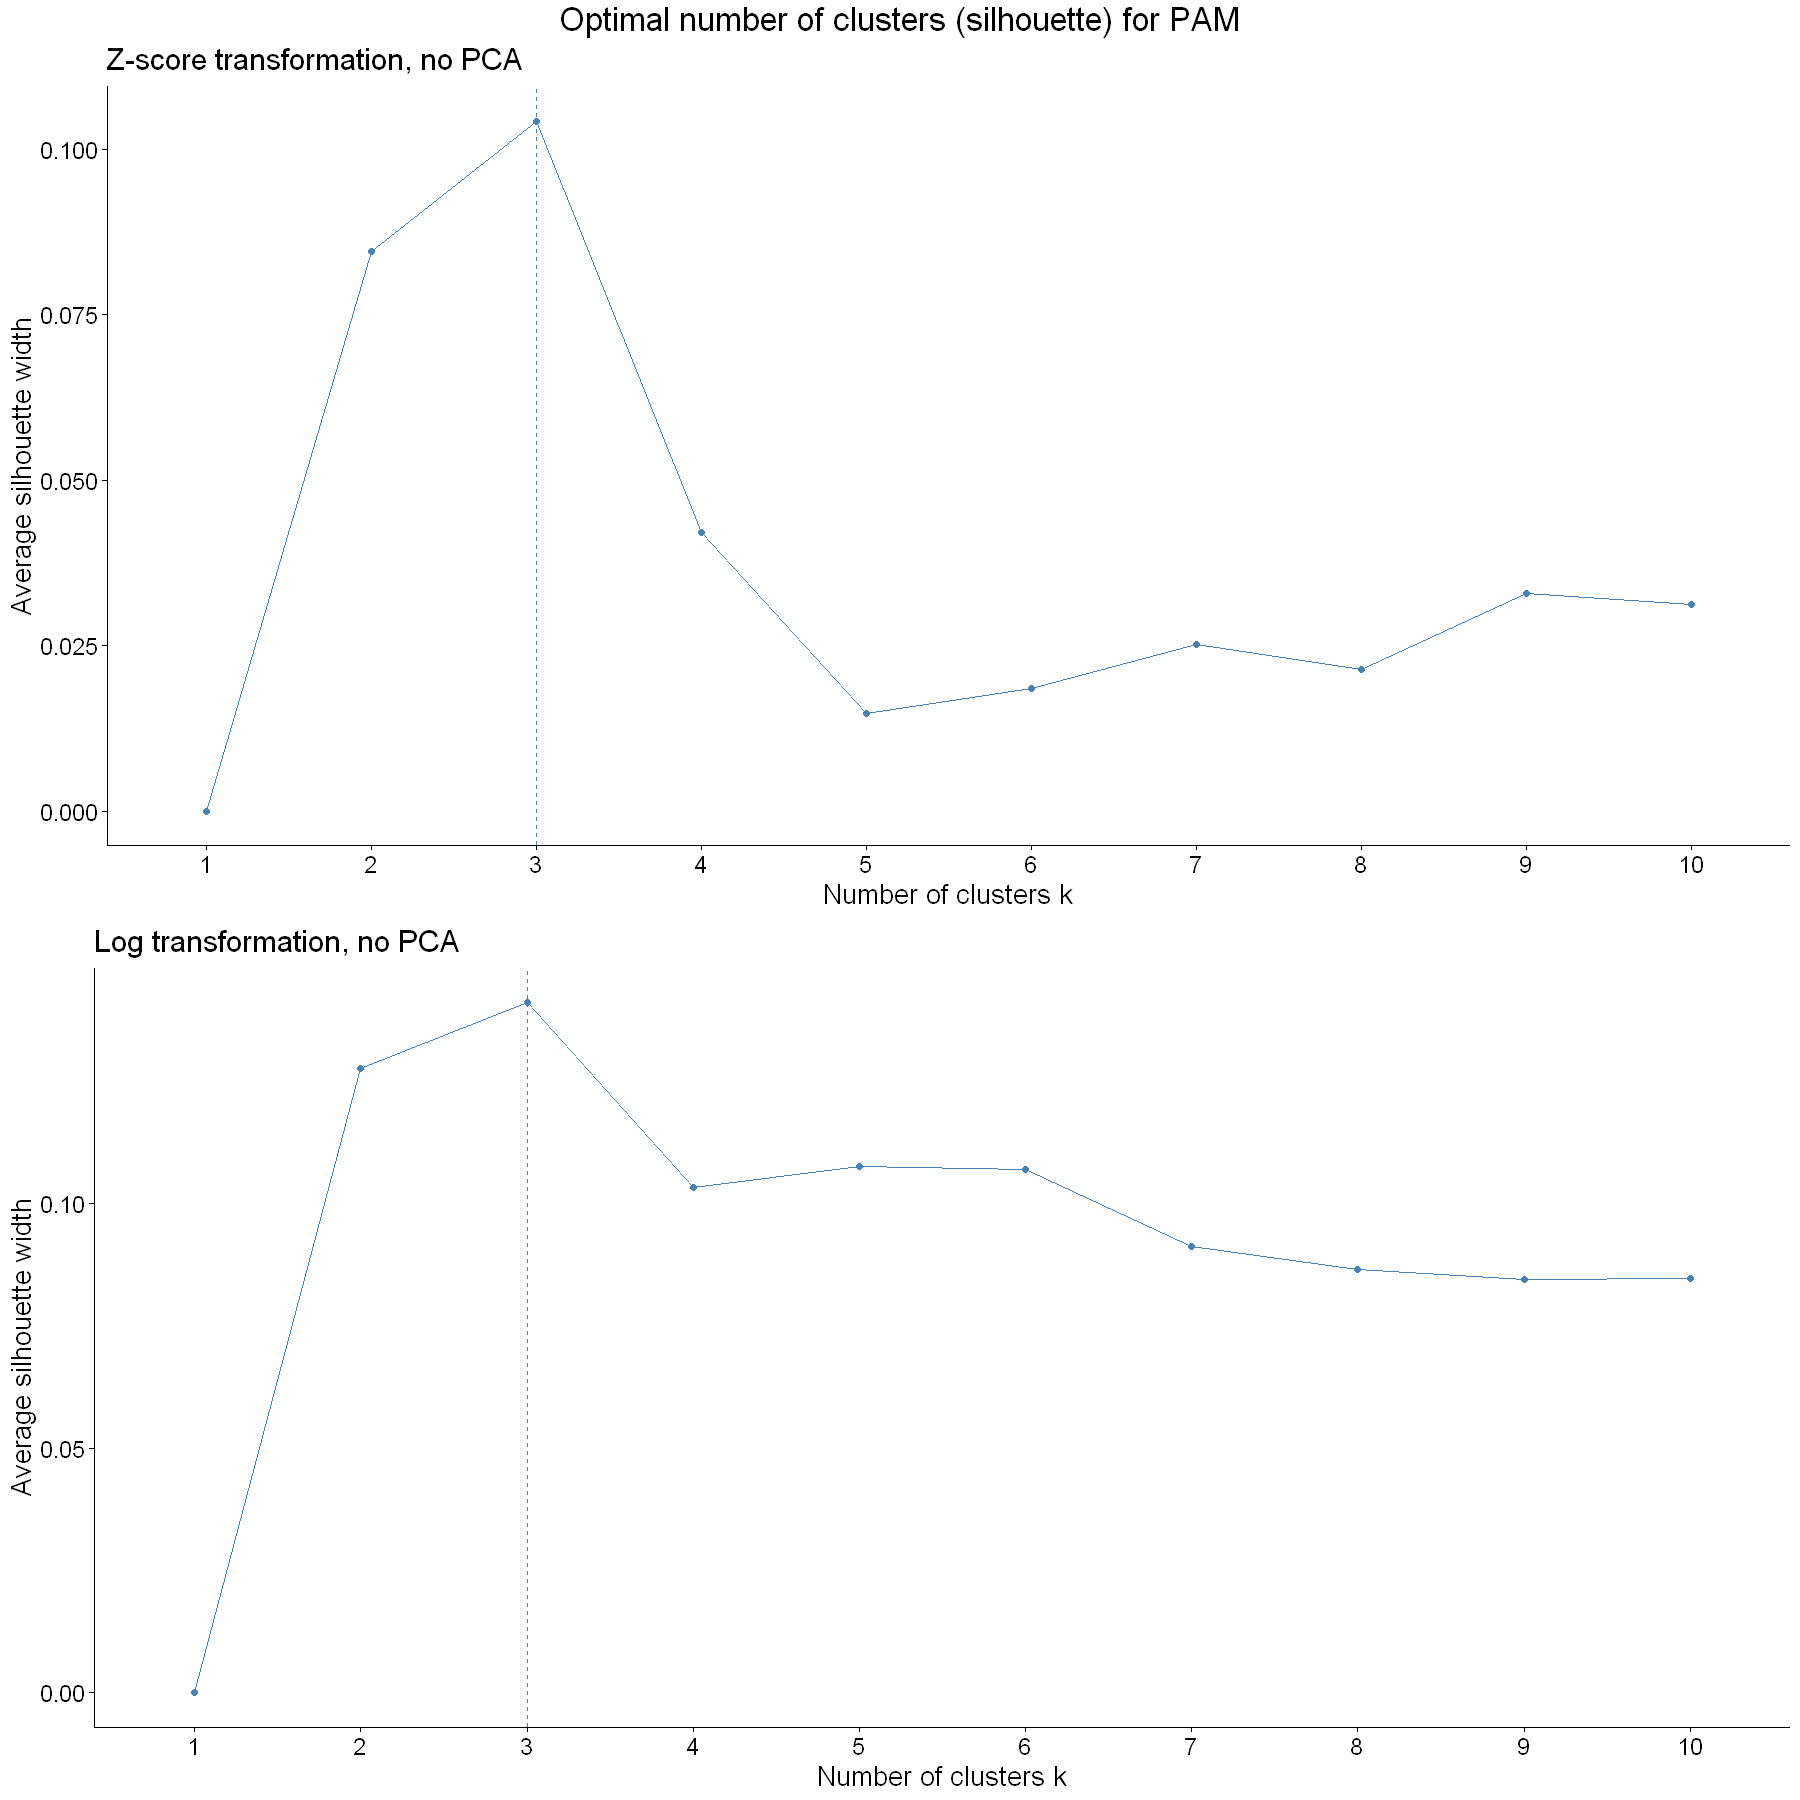

In [105]:
options(repr.plot.width = 15, repr.plot.height = 15)
grid.arrange(clust_plot_scaled, clust_plot_log, ncol=1, top=textGrob("Optimal number of clusters (silhouette) for PAM", gp=gpar(fontsize=20)))

In [106]:
clust_plot_scaled_pca <- fviz_nbclust(pca_scores_scaled, FUNcluster = cluster::pam, method = "silhouette") +
    theme(
        plot.title = element_text(size = 18),
        axis.title = element_text(size = 16),         
        axis.text.x = element_text(size = 14),        
        axis.text.y = element_text(size = 14)) +
    ggtitle("Z-score transformation + PCA")
clust_plot_log_pca <- fviz_nbclust(pca_scores_log, FUNcluster = cluster::pam, method = "silhouette") +
    theme(
        plot.title = element_text(size = 18),
        axis.title = element_text(size = 16),         
        axis.text.x = element_text(size = 14),        
        axis.text.y = element_text(size = 14)) +
    ggtitle("Log transformation + PCA")

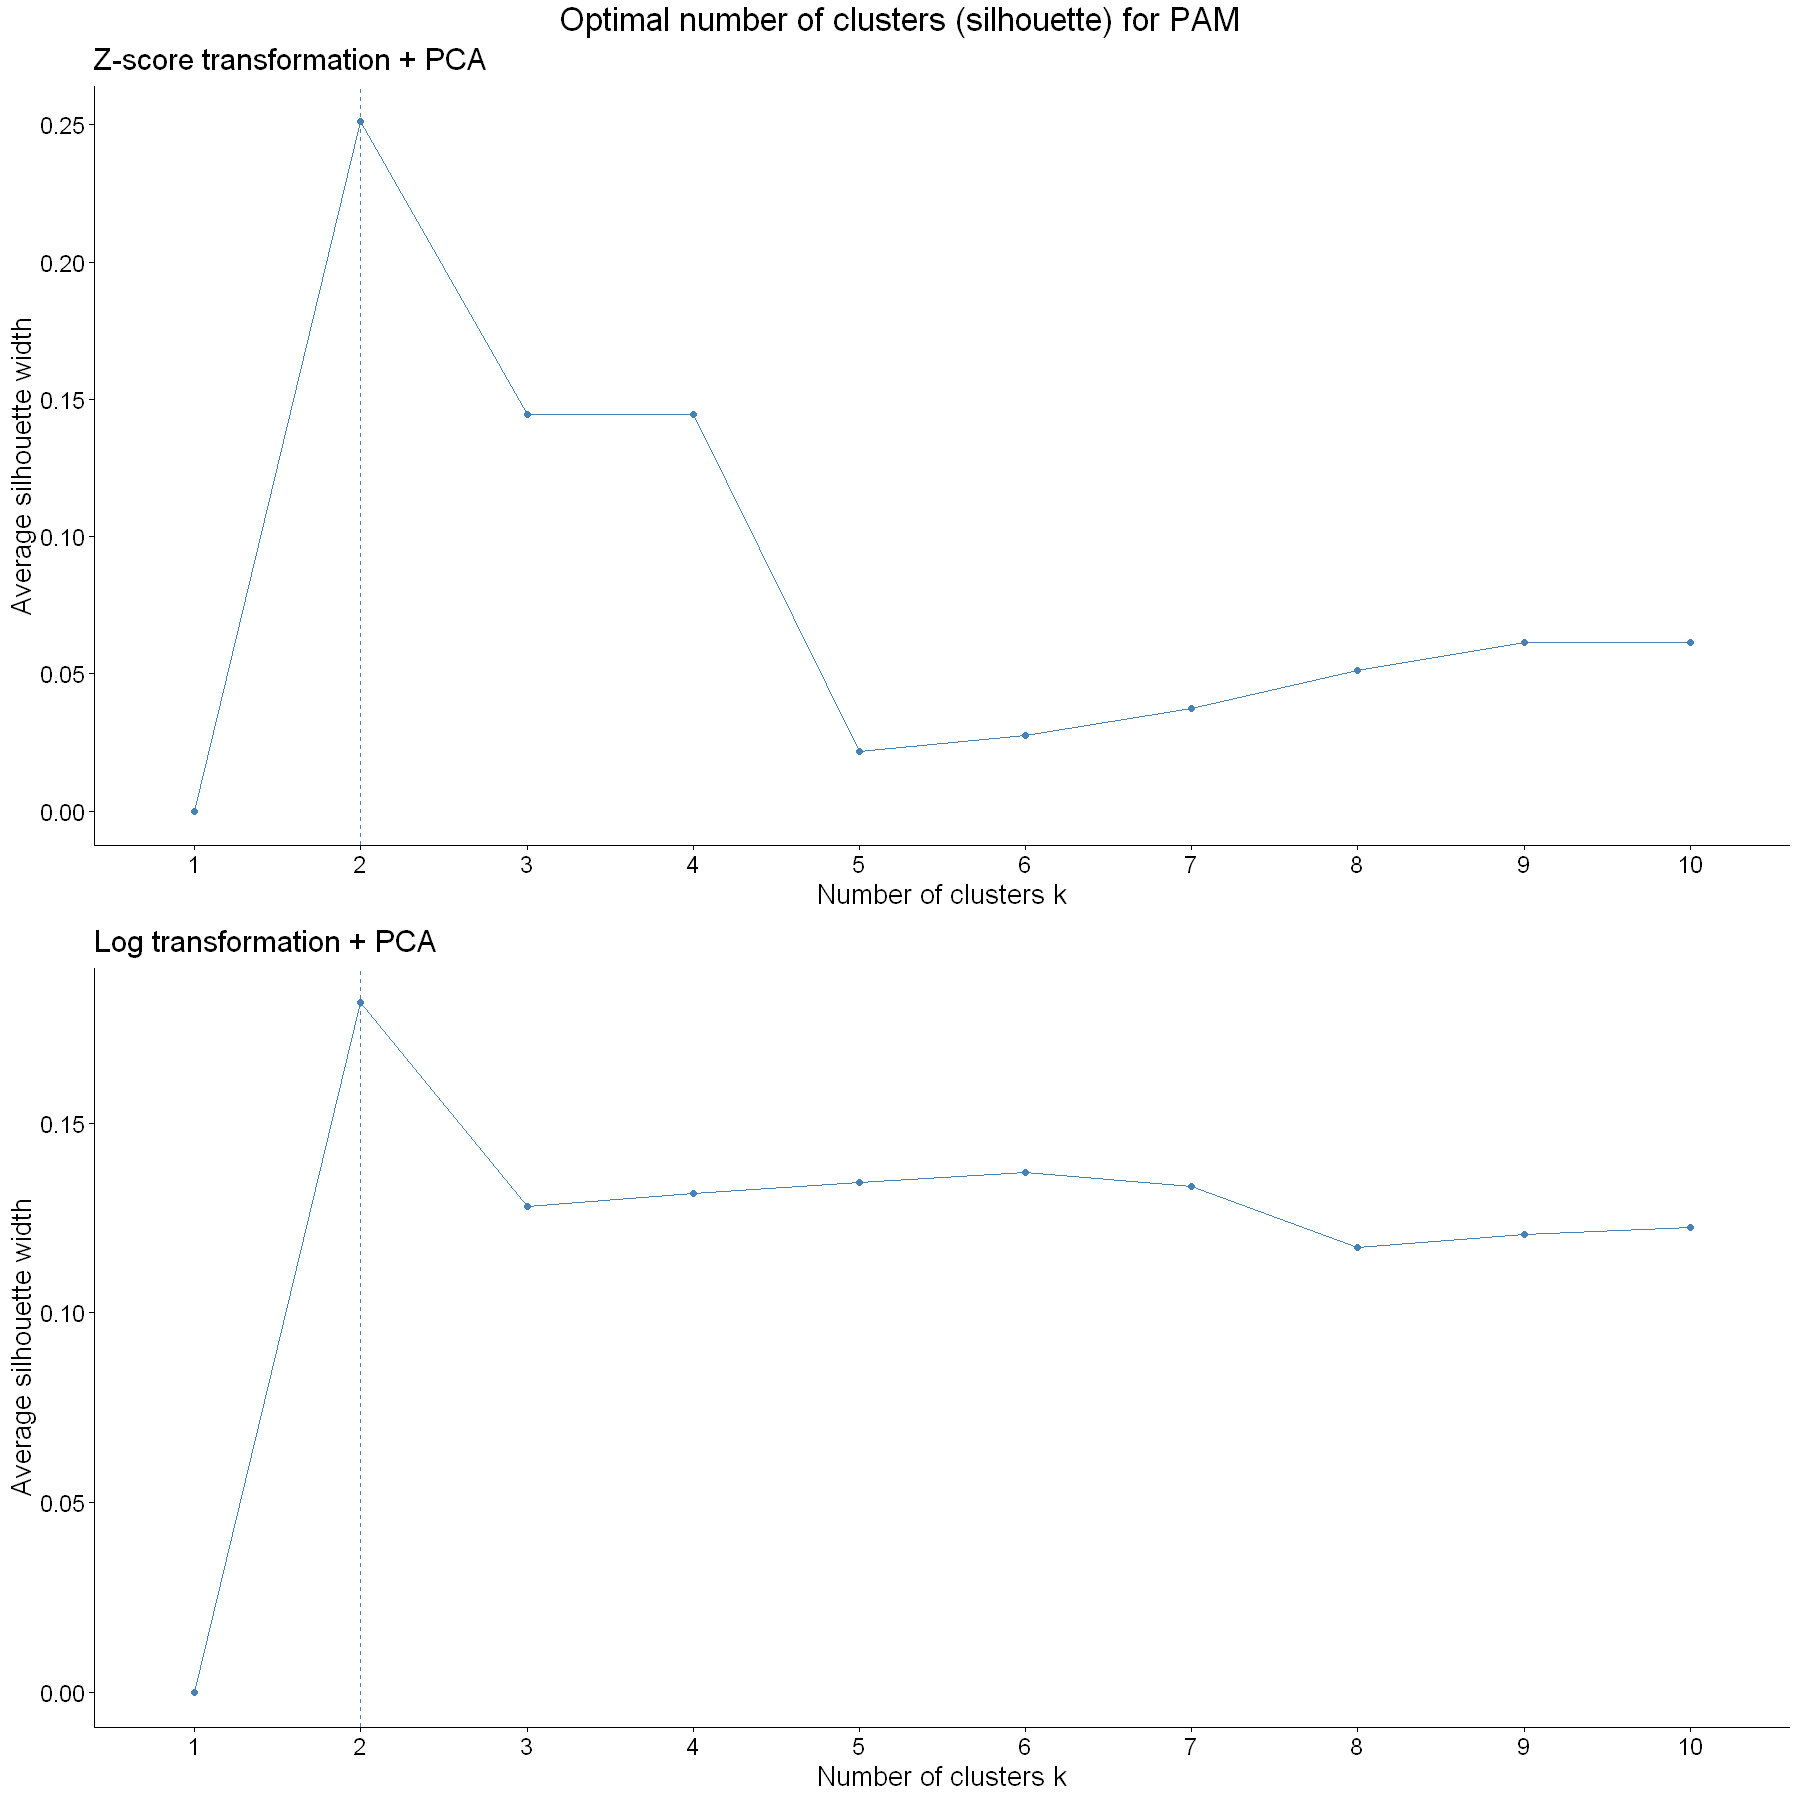

In [107]:
options(repr.plot.width = 15, repr.plot.height = 15)
grid.arrange(clust_plot_scaled_pca, clust_plot_log_pca, ncol=1, top=textGrob("Optimal number of clusters (silhouette) for PAM", gp=gpar(fontsize=20)))

In [36]:
agnes_scaled <- agnes(spam_scaled[, -56], method="ward")

In [40]:
agnes_scaled_dendro <- as.dendrogram(agnes_scaled)
dendro_data_scaled <- dendro_data(agnes_scaled_dendro)

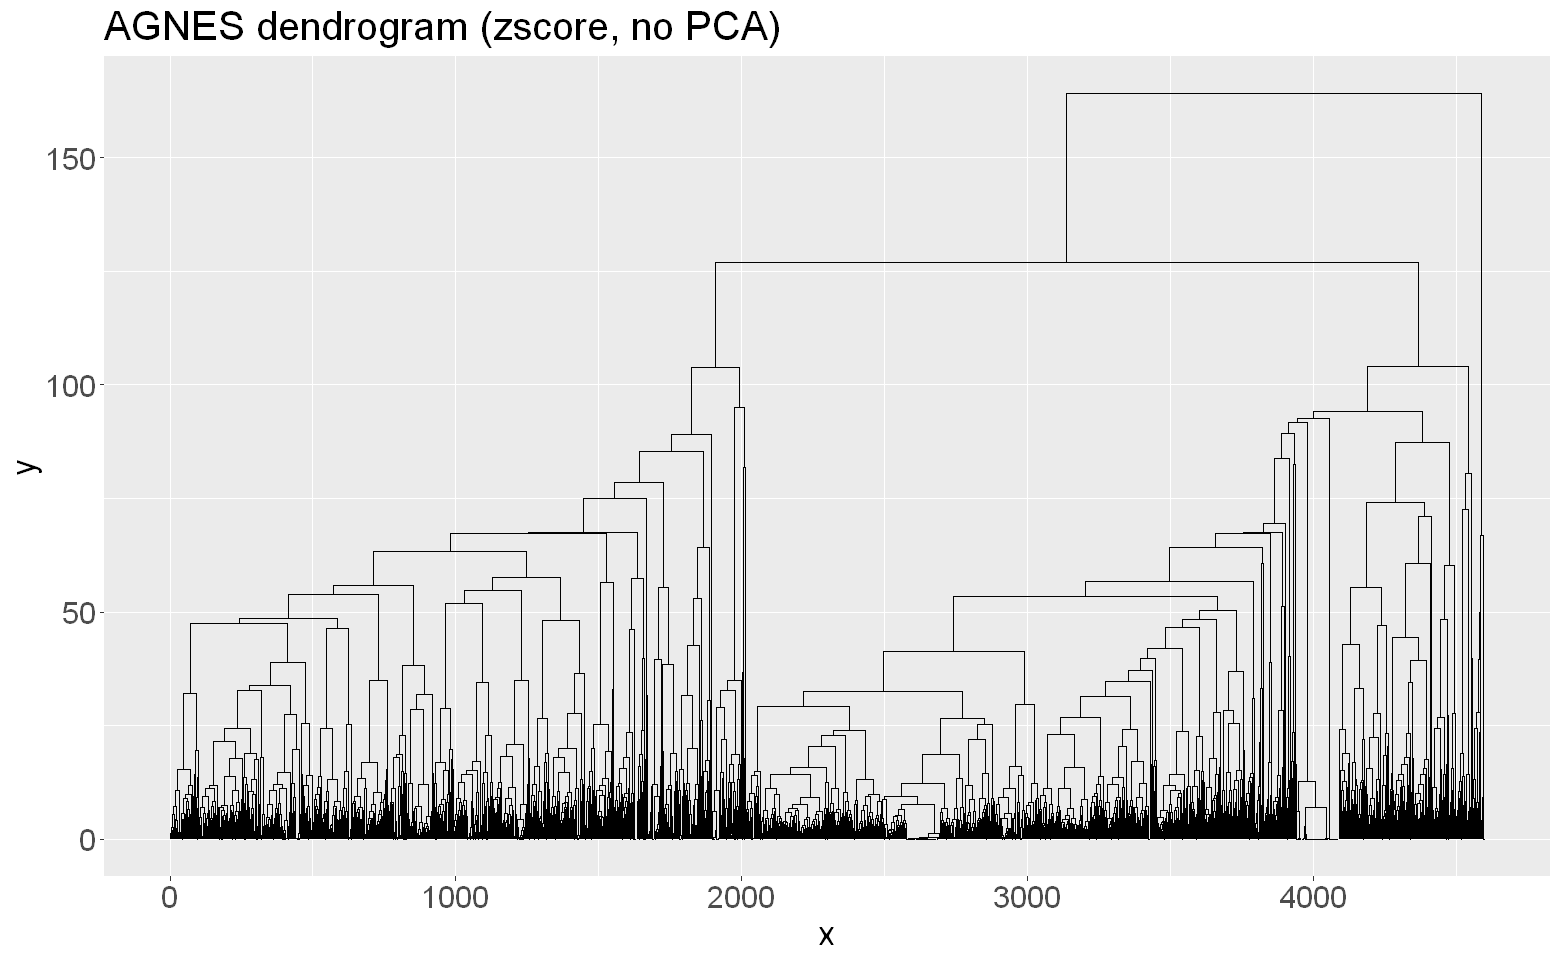

In [41]:
options(repr.plot.width = 13, repr.plot.height = 8)
ggplot(segment(dendro_data_scaled)) + geom_segment(aes(x=x, y=y, xend=xend, yend=yend)) + ggtitle("AGNES dendrogram (zscore, no PCA)") +
        theme(
                plot.title = element_text(size = 24),
                axis.title = element_text(size = 20),         
                axis.text.x = element_text(size = 18),        
                axis.text.y = element_text(size = 18))

In [42]:
agnes_scaled_pca <- agnes(pca_scores_scaled, method="ward")

In [43]:
agnes_scaled_dendro_pca <- as.dendrogram(agnes_scaled_pca)
dendro_data_scaled_pca <- dendro_data(agnes_scaled_dendro_pca)

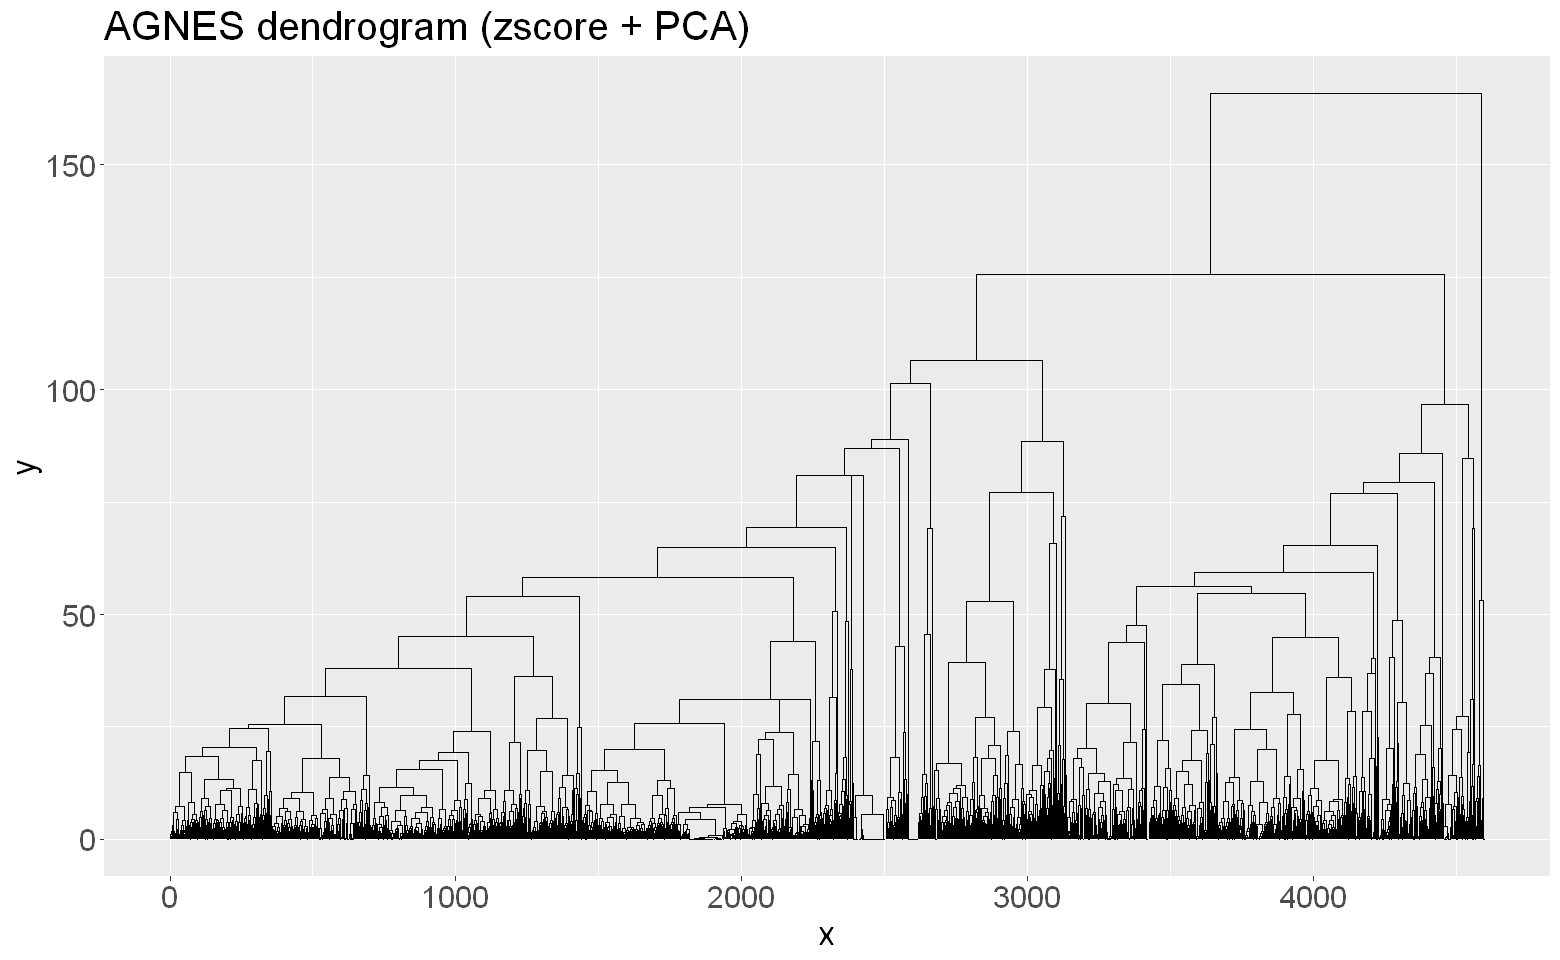

In [44]:
options(repr.plot.width = 13, repr.plot.height = 8)
ggplot(segment(dendro_data_scaled_pca)) + geom_segment(aes(x=x, y=y, xend=xend, yend=yend)) + ggtitle("AGNES dendrogram (zscore + PCA)") +
        theme(
                plot.title = element_text(size = 24),
                axis.title = element_text(size = 20),         
                axis.text.x = element_text(size = 18),        
                axis.text.y = element_text(size = 18))

In [45]:
agnes_log <- agnes(spam_log[, -56], method="ward")

In [46]:
agnes_log_dendro <- as.dendrogram(agnes_log)
dendro_data_log <- dendro_data(agnes_log_dendro)

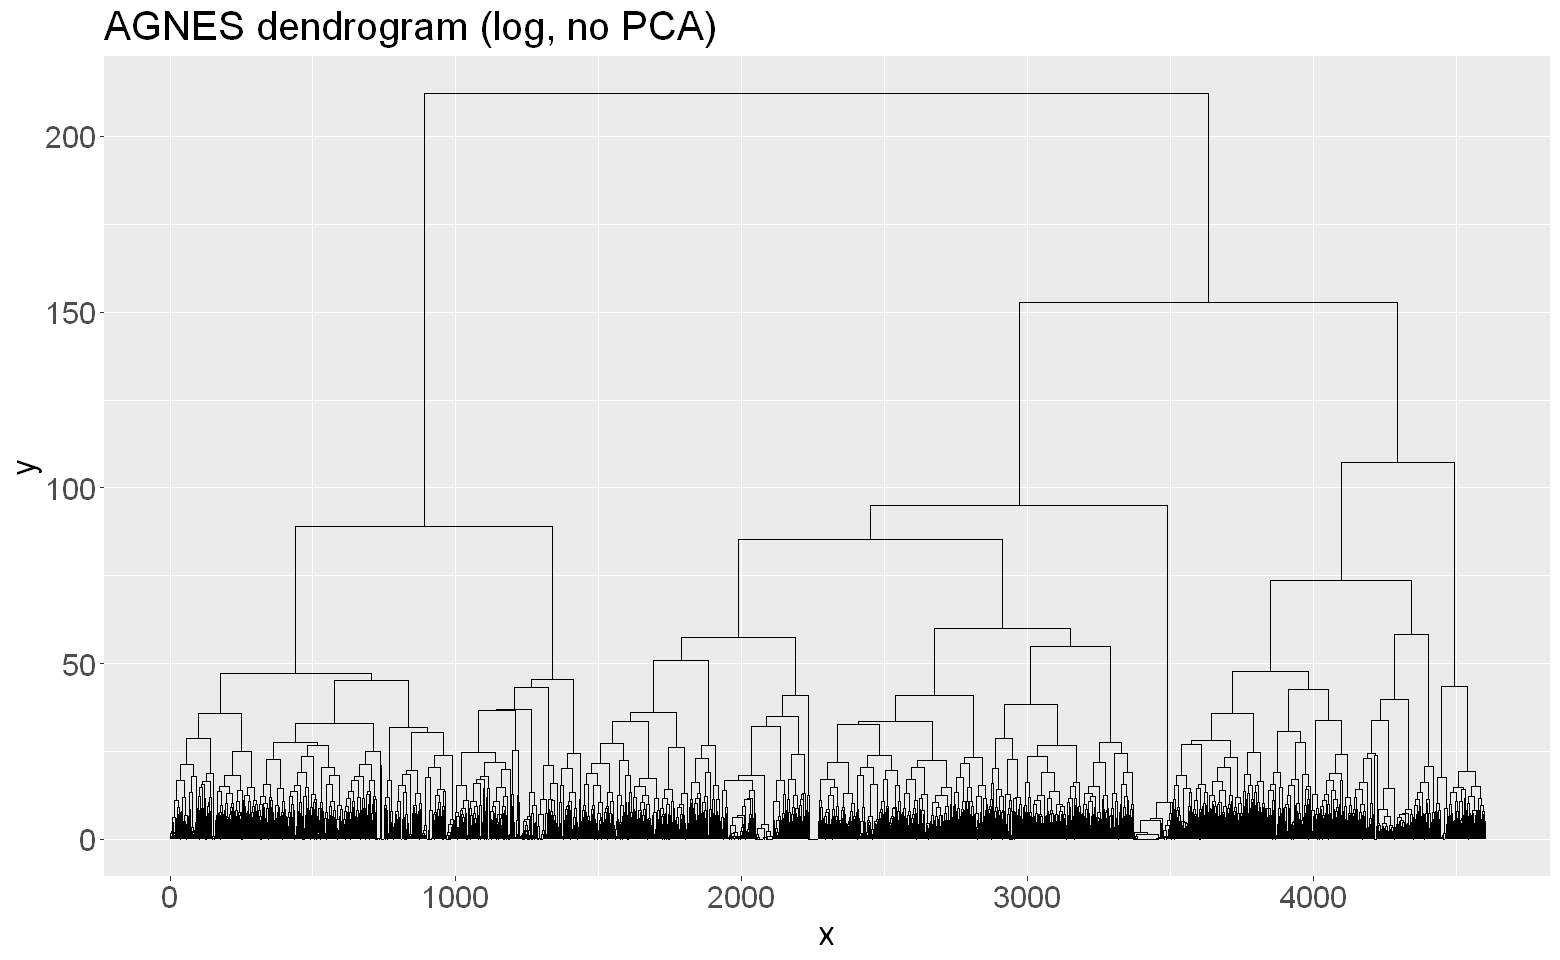

In [47]:
options(repr.plot.width = 13, repr.plot.height = 8)
ggplot(segment(dendro_data_log)) + geom_segment(aes(x=x, y=y, xend=xend, yend=yend)) + ggtitle("AGNES dendrogram (log, no PCA)") +
        theme(
                plot.title = element_text(size = 24),
                axis.title = element_text(size = 20),         
                axis.text.x = element_text(size = 18),        
                axis.text.y = element_text(size = 18))

In [48]:
agnes_log_pca <- agnes(pca_scores_log, method="ward")

In [49]:
agnes_log_dendro_pca <- as.dendrogram(agnes_log_pca)
dendro_data_log_pca <- dendro_data(agnes_log_dendro_pca)

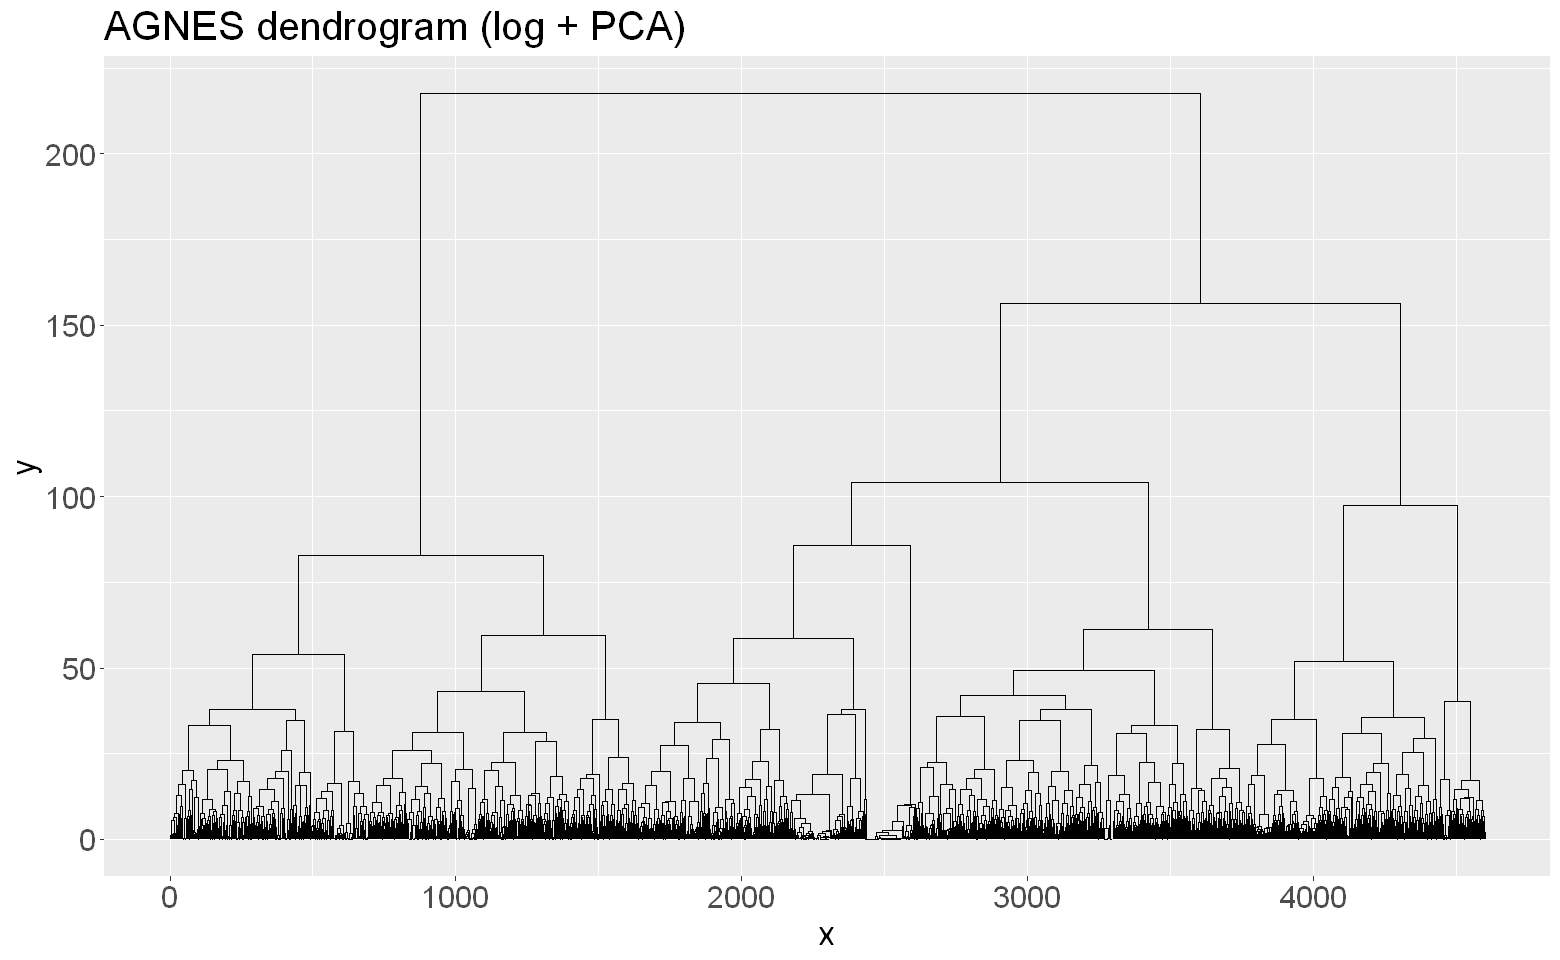

In [50]:
options(repr.plot.width = 13, repr.plot.height = 8)
ggplot(segment(dendro_data_log_pca)) + geom_segment(aes(x=x, y=y, xend=xend, yend=yend)) + ggtitle("AGNES dendrogram (log + PCA)") +
        theme(
                plot.title = element_text(size = 24),
                axis.title = element_text(size = 20),         
                axis.text.x = element_text(size = 18),        
                axis.text.y = element_text(size = 18))

### Clustering

In [82]:
set.seed(123)

In [13]:
k_kmeans_scaled <- 2
k_kmeans_log <- 3
k_kmeans_scaled_pca <- 2
k_kmeans_log_pca <- 3
k_pam_scaled <- 3
k_pam_log <- 3
k_pam_scaled_pca <- 2
k_pam_log_pca <- 2
k_agnes_scaled <- 2
k_agnes_log <- 3
k_agnes_scaled_pca <- 2
k_agnes_log_pca <- 3

In [14]:
kmeans_clust_scaled <- kmeans(spam_scaled[, -56], centers = k_kmeans_scaled, nstart=10)
kmeans_clust_log <- kmeans(spam_log[, -56], centers = k_kmeans_log, nstart=10)
kmeans_clust_scaled_pca <- kmeans(pca_scores_scaled, centers = k_kmeans_scaled_pca, nstart=10)
kmeans_clust_log_pca <- kmeans(pca_scores_log, centers = k_kmeans_log_pca, nstart=10)

In [15]:
pam_clust_scaled <- pam(spam_scaled[, -56], k = k_pam_scaled)
pam_clust_log <- pam(spam_log[, -56], k = k_pam_log)
pam_clust_scaled_pca <- pam(pca_scores_scaled, k = k_pam_scaled_pca)
pam_clust_log_pca <- pam(pca_scores_log, k = k_pam_log_pca)

In [16]:
options(repr.plot.width = 13, repr.plot.height = 8)

In [17]:
kmeans_scaled_res <- pca_scores_scaled
kmeans_scaled_res$cluster <- as.factor(kmeans_clust_scaled$cluster)
kmeans_scaled_res$type <- spam$type

kmeans_log_res <- pca_scores_log
kmeans_log_res$cluster <- as.factor(kmeans_clust_log$cluster)
kmeans_log_res$type <- spam$type

kmeans_scaled_res_pca <- pca_scores_scaled
kmeans_scaled_res_pca$cluster <- as.factor(kmeans_clust_scaled_pca$cluster)
kmeans_scaled_res_pca$type <- spam$type

kmeans_log_res_pca <- pca_scores_log
kmeans_log_res_pca$cluster <- as.factor(kmeans_clust_log_pca$cluster)
kmeans_log_res_pca$type <- spam$type

In [18]:
pam_scaled_res <- pca_scores_scaled
pam_scaled_res$cluster <- as.factor(pam_clust_scaled$cluster)
pam_scaled_res$type <- spam$type

pam_log_res <- pca_scores_log
pam_log_res$cluster <- as.factor(pam_clust_log$cluster)
pam_log_res$type <- spam$type

pam_scaled_res_pca <- pca_scores_scaled
pam_scaled_res_pca$cluster <- as.factor(pam_clust_scaled_pca$cluster)
pam_scaled_res_pca$type <- spam$type

pam_log_res_pca <- pca_scores_log
pam_log_res_pca$cluster <- as.factor(pam_clust_log_pca$cluster)
pam_log_res_pca$type <- spam$type

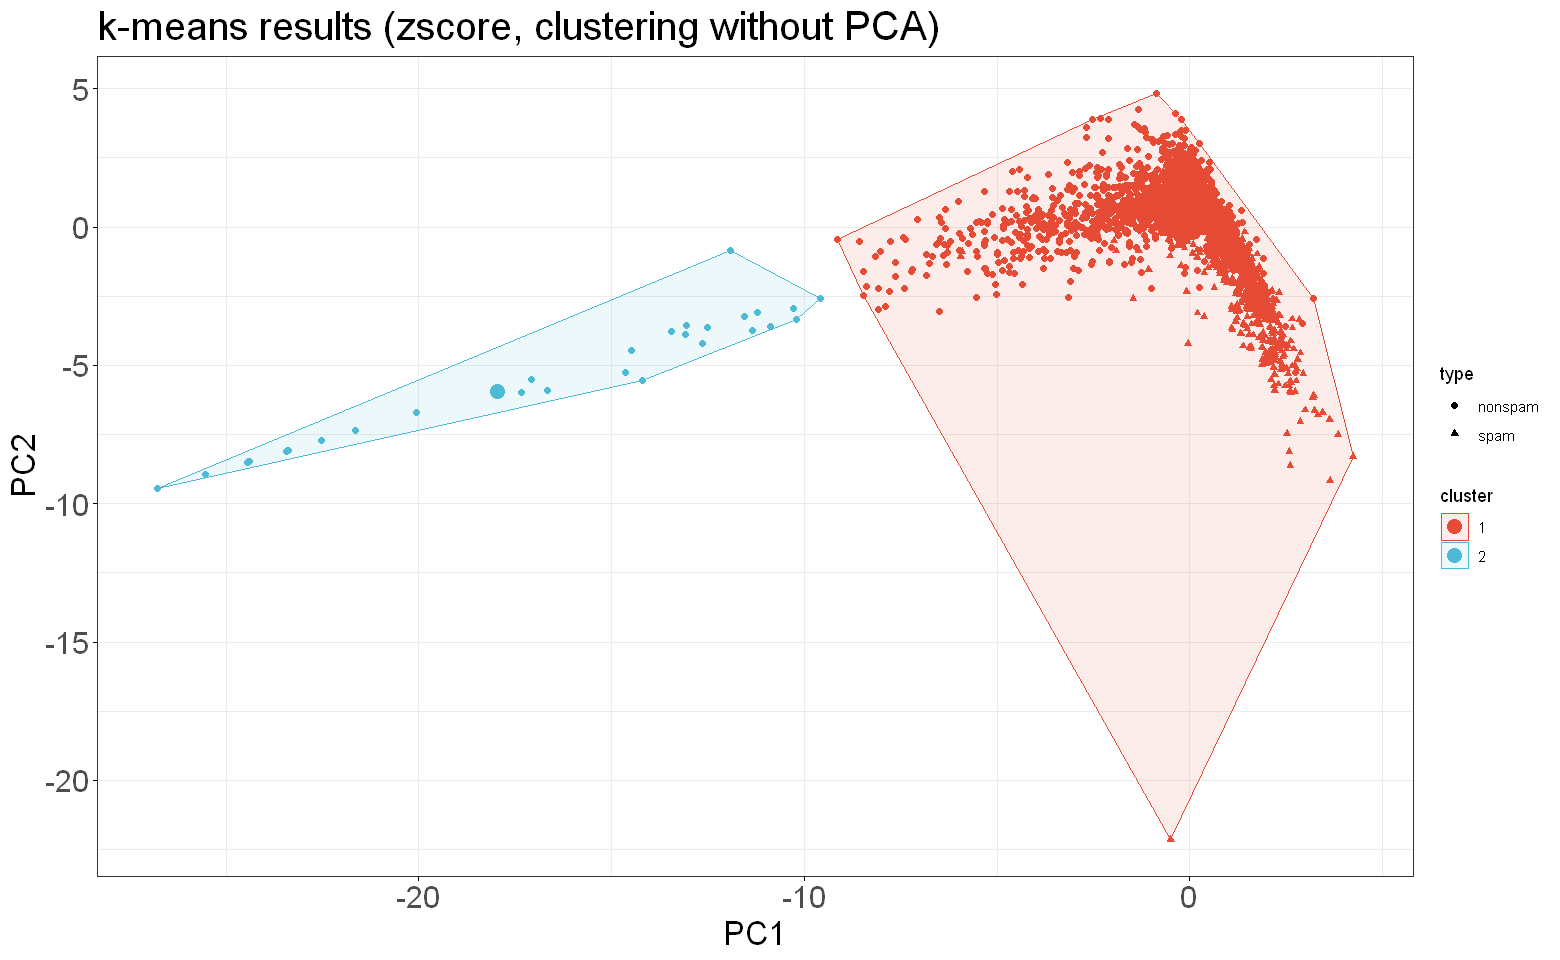

In [19]:
ggscatter(
  kmeans_scaled_res, x = "PC1", y = "PC2", 
  color = "cluster", palette = "npg", ellipse = TRUE, ellipse.type = "convex",
  shape = "type", size = 1.5,  legend = "right", ggtheme = theme_bw()) +
  stat_mean(aes(color = cluster), size = 4) +
  ggtitle("k-means results (zscore, clustering without PCA)") +
  theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))

In [20]:
table(kmeans_scaled_res$cluster, kmeans_scaled_res$type)

   
    nonspam spam
  1    2751 1813
  2      37    0

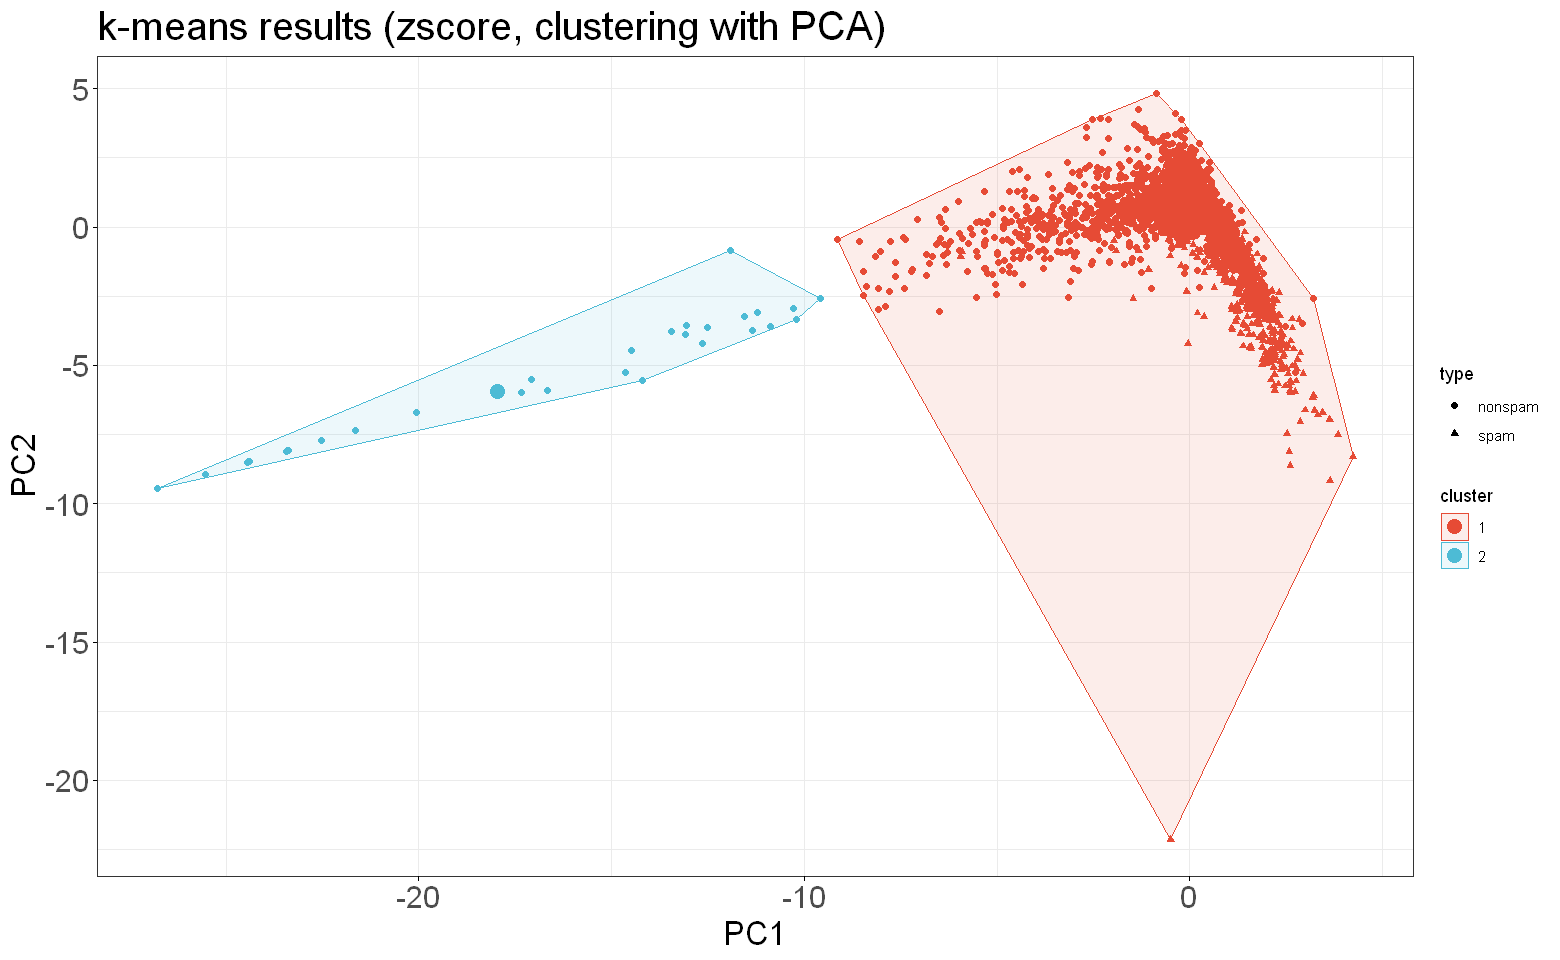

In [21]:
ggscatter(
  kmeans_scaled_res_pca, x = "PC1", y = "PC2", 
  color = "cluster", palette = "npg", ellipse = TRUE, ellipse.type = "convex",
  shape = "type", size = 1.5,  legend = "right", ggtheme = theme_bw()) +
  stat_mean(aes(color = cluster), size = 4) +
  ggtitle("k-means results (zscore, clustering with PCA)") +
  theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))

In [22]:
table(kmeans_scaled_res_pca$cluster, kmeans_scaled_res_pca$type)

   
    nonspam spam
  1    2751 1813
  2      37    0

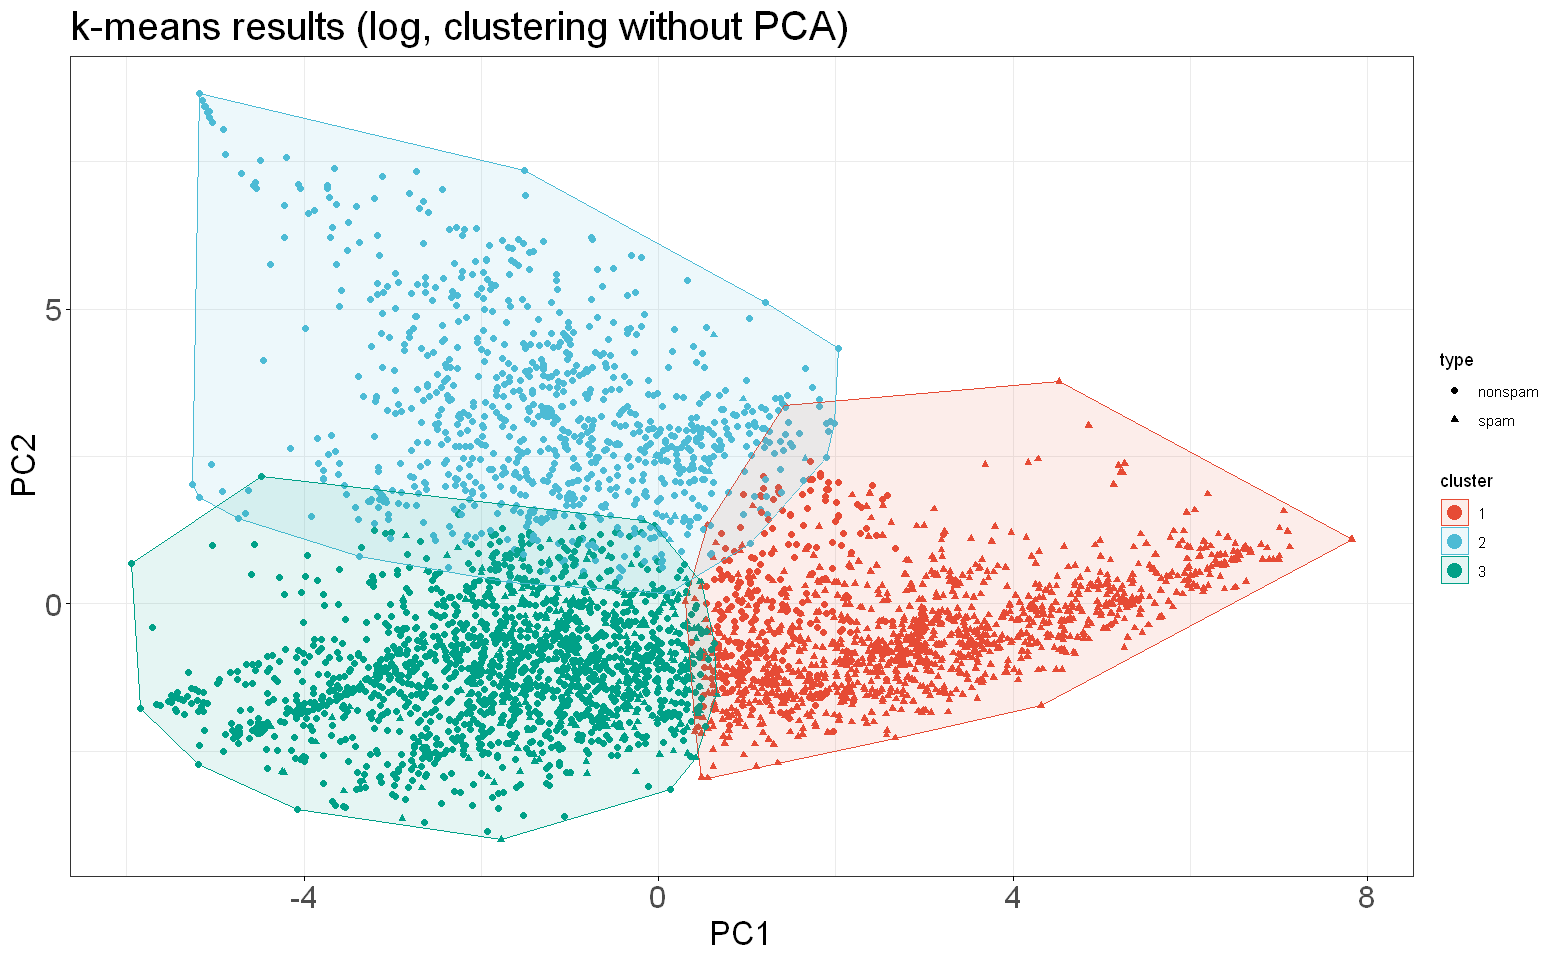

In [23]:
ggscatter(
  kmeans_log_res, x = "PC1", y = "PC2", 
  color = "cluster", palette = "npg", ellipse = TRUE, ellipse.type = "convex",
  shape = "type", size = 1.5,  legend = "right", ggtheme = theme_bw()) +
  stat_mean(aes(color = cluster), size = 4) +
  ggtitle("k-means results (log, clustering without PCA)") +
  theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))

In [24]:
table(kmeans_log_res$cluster, kmeans_log_res$type)

   
    nonspam spam
  1     262 1476
  2     900   11
  3    1626  326

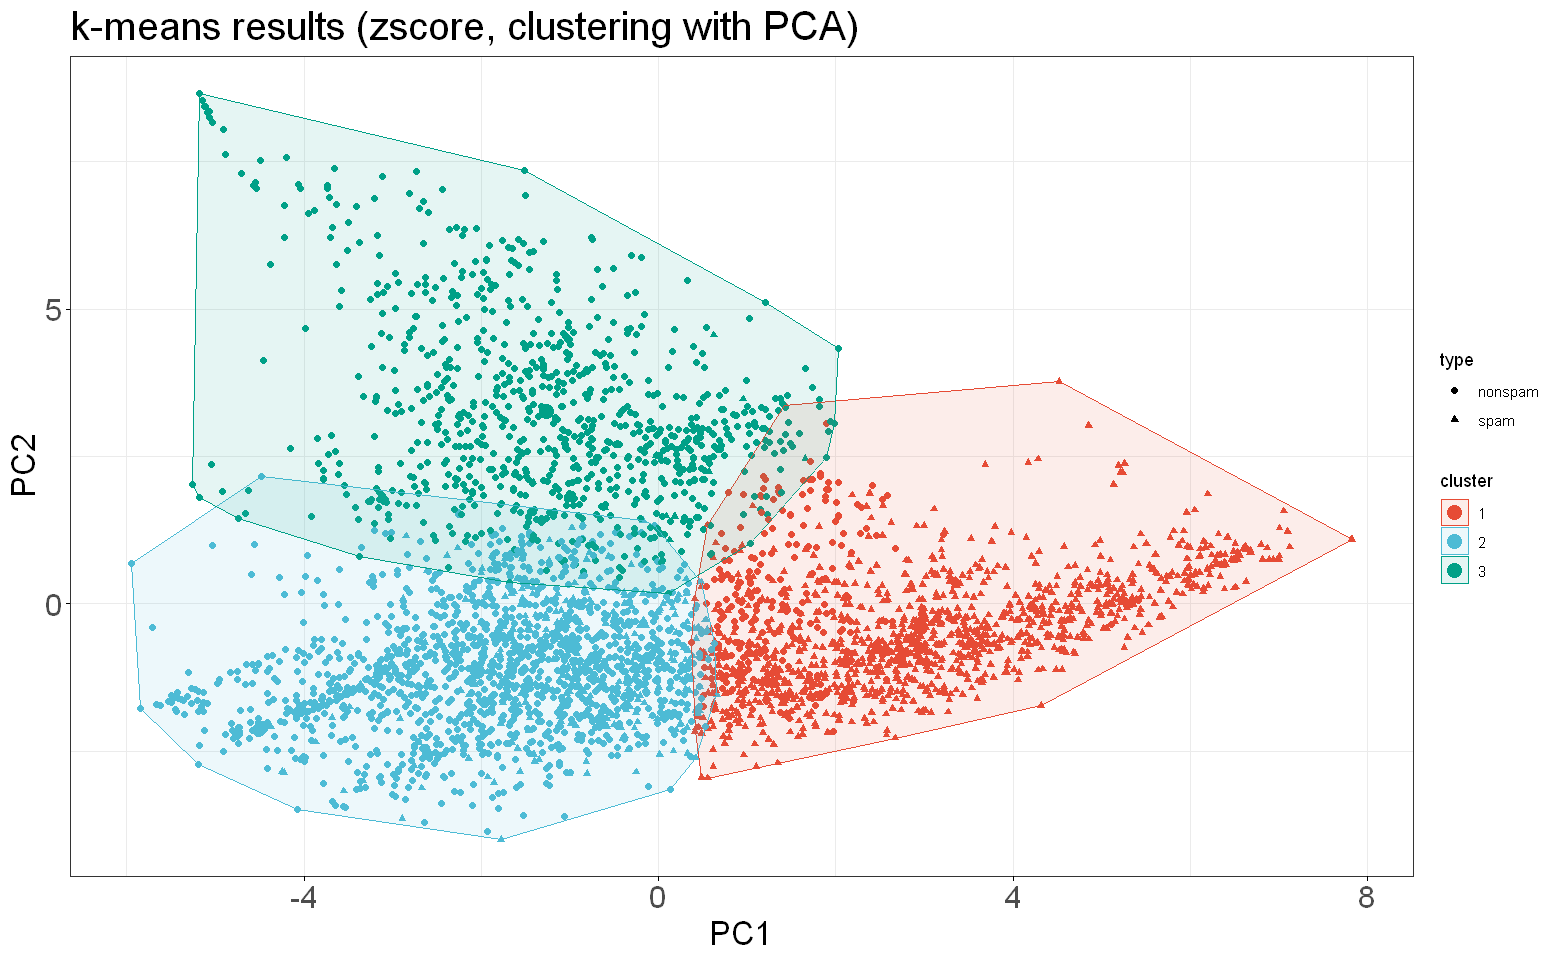

In [25]:
ggscatter(
  kmeans_log_res_pca, x = "PC1", y = "PC2", 
  color = "cluster", palette = "npg", ellipse = TRUE, ellipse.type = "convex",
  shape = "type", size = 1.5,  legend = "right", ggtheme = theme_bw()) +
  stat_mean(aes(color = cluster), size = 4) +
  ggtitle("k-means results (zscore, clustering with PCA)") +
  theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))

In [26]:
table(kmeans_log_res_pca$cluster, kmeans_log_res_pca$type)

   
    nonspam spam
  1     267 1474
  2    1628  328
  3     893   11

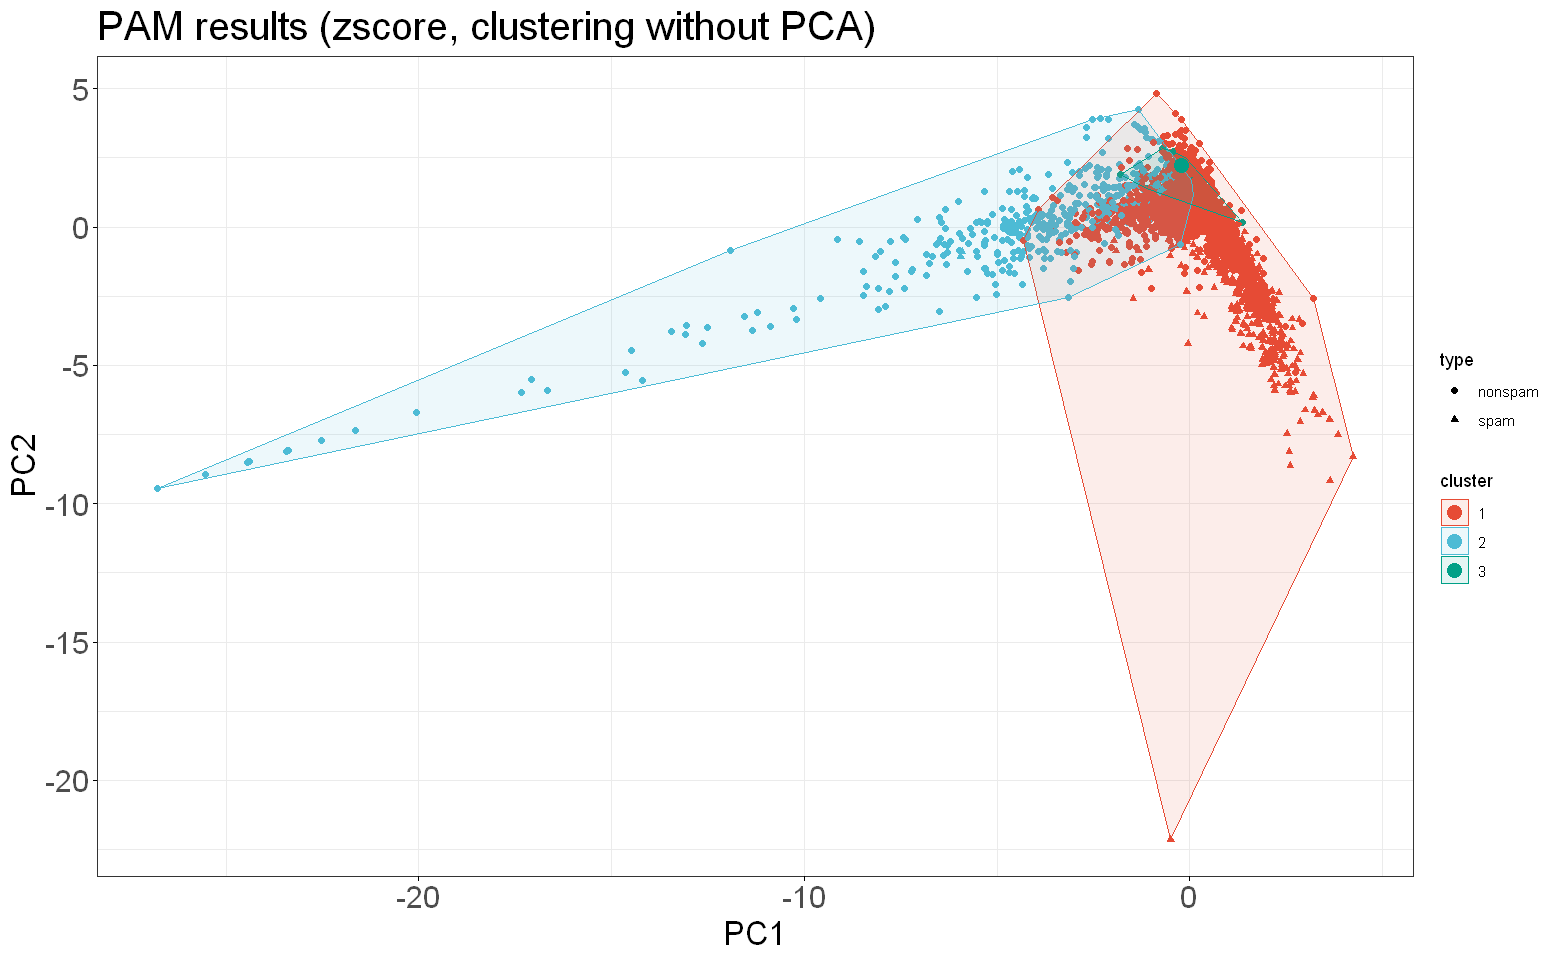

In [27]:
ggscatter(
  pam_scaled_res, x = "PC1", y = "PC2", 
  color = "cluster", palette = "npg", ellipse = TRUE, ellipse.type = "convex",
  shape = "type", size = 1.5,  legend = "right", ggtheme = theme_bw()) +
  stat_mean(aes(color = cluster), size = 4) +
  ggtitle("PAM results (zscore, clustering without PCA)") +
  theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))

In [28]:
table(pam_scaled_res$cluster, pam_scaled_res$type)

   
    nonspam spam
  1    2242 1810
  2     421    3
  3     125    0

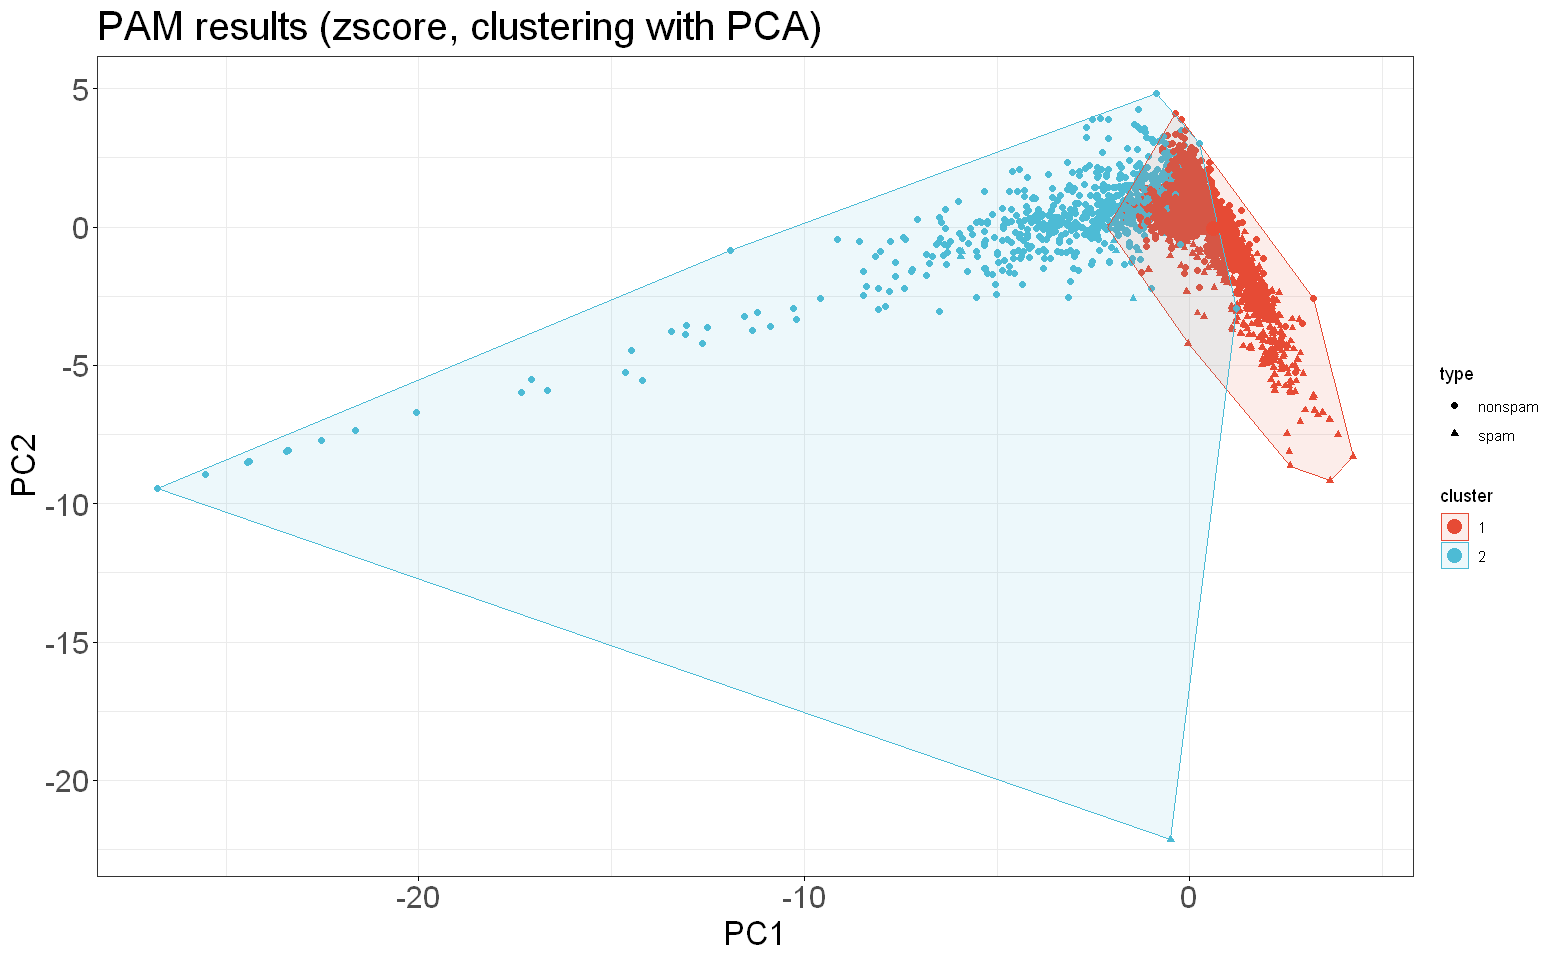

In [29]:
ggscatter(
  pam_scaled_res_pca, x = "PC1", y = "PC2", 
  color = "cluster", palette = "npg", ellipse = TRUE, ellipse.type = "convex",
  shape = "type", size = 1.5,  legend = "right", ggtheme = theme_bw()) +
  stat_mean(aes(color = cluster), size = 4) +
  ggtitle("PAM results (zscore, clustering with PCA)") +
  theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))

In [30]:
table(pam_scaled_res_pca$cluster, pam_scaled_res_pca$type)

   
    nonspam spam
  1    2120 1798
  2     668   15

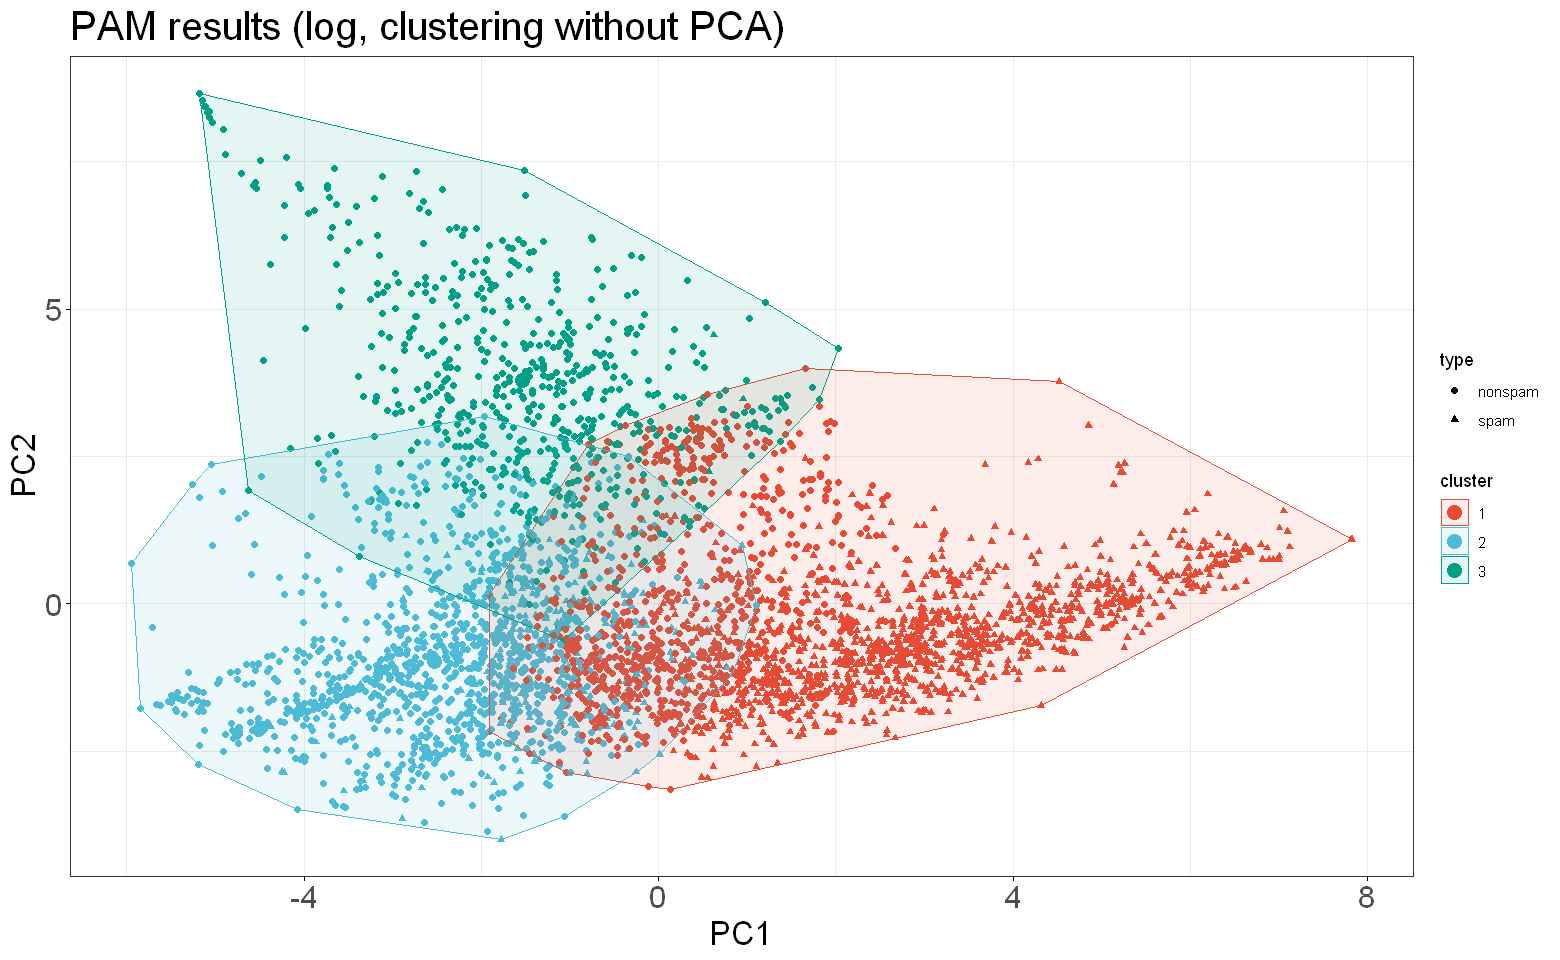

In [31]:
ggscatter(
  pam_log_res, x = "PC1", y = "PC2", 
  color = "cluster", palette = "npg", ellipse = TRUE, ellipse.type = "convex",
  shape = "type", size = 1.5,  legend = "right", ggtheme = theme_bw()) +
  stat_mean(aes(color = cluster), size = 4) +
  ggtitle("PAM results (log, clustering without PCA)") +
  theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))

In [32]:
table(pam_log_res$cluster, pam_log_res$type)

   
    nonspam spam
  1     796 1558
  2    1376  250
  3     616    5

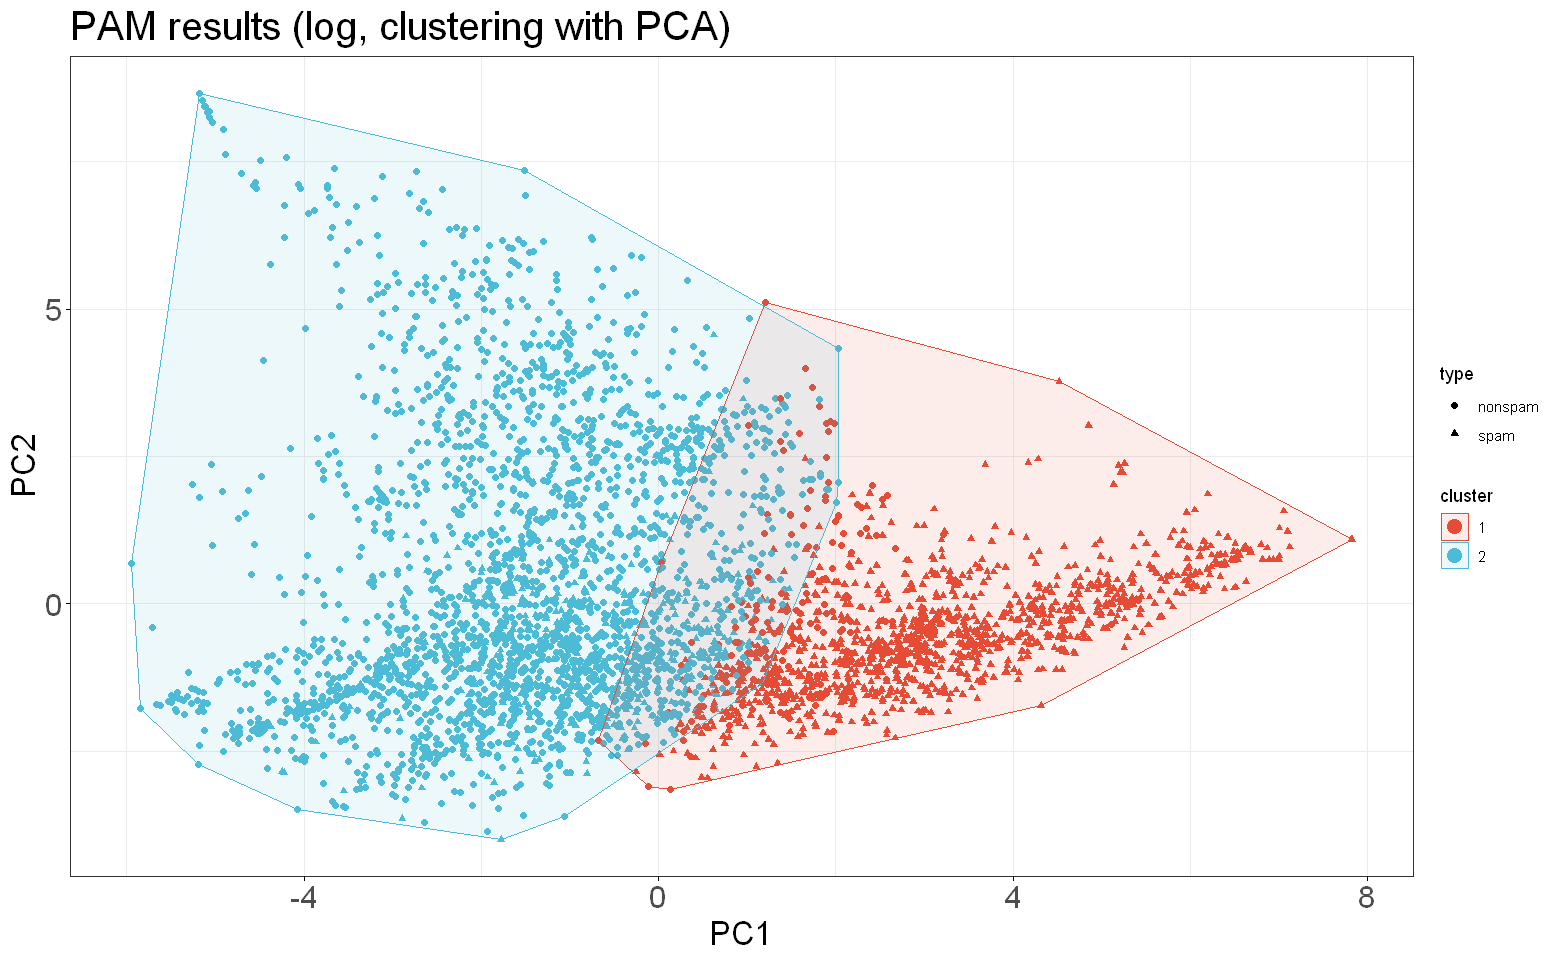

In [33]:
ggscatter(
  pam_log_res_pca, x = "PC1", y = "PC2", 
  color = "cluster", palette = "npg", ellipse = TRUE, ellipse.type = "convex",
  shape = "type", size = 1.5,  legend = "right", ggtheme = theme_bw()) +
  stat_mean(aes(color = cluster), size = 4) +
  ggtitle("PAM results (log, clustering with PCA)") +
  theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))

In [34]:
table(pam_log_res_pca$cluster, pam_log_res_pca$type)

   
    nonspam spam
  1     203 1438
  2    2585  375

In [51]:
groupind_scaled <- cutree(as.hclust(agnes_scaled), k = k_agnes_scaled+1) # k+1 clusters to handle outliers
groupind_scaled_pca <- cutree(as.hclust(agnes_scaled_pca), k = k_agnes_log+1)
groupind_log <- cutree(as.hclust(agnes_log), k = k_agnes_scaled_pca)
groupind_log_pca <- cutree(as.hclust(agnes_log_pca), k = k_agnes_log_pca)

In [52]:
agnes_scaled_res <- pca_scores_scaled
agnes_scaled_res$cluster <- as.factor(groupind_scaled)
agnes_scaled_res$type <- spam$type

agnes_log_res <- pca_scores_log
agnes_log_res$cluster <- as.factor(groupind_log)
agnes_log_res$type <- spam$type

agnes_scaled_res_pca <- pca_scores_scaled
agnes_scaled_res_pca$cluster <- as.factor(groupind_scaled_pca)
agnes_scaled_res_pca$type <- spam$type

agnes_log_res_pca <- pca_scores_log
agnes_log_res_pca$cluster <- as.factor(groupind_log_pca)
agnes_log_res_pca$type <- spam$type

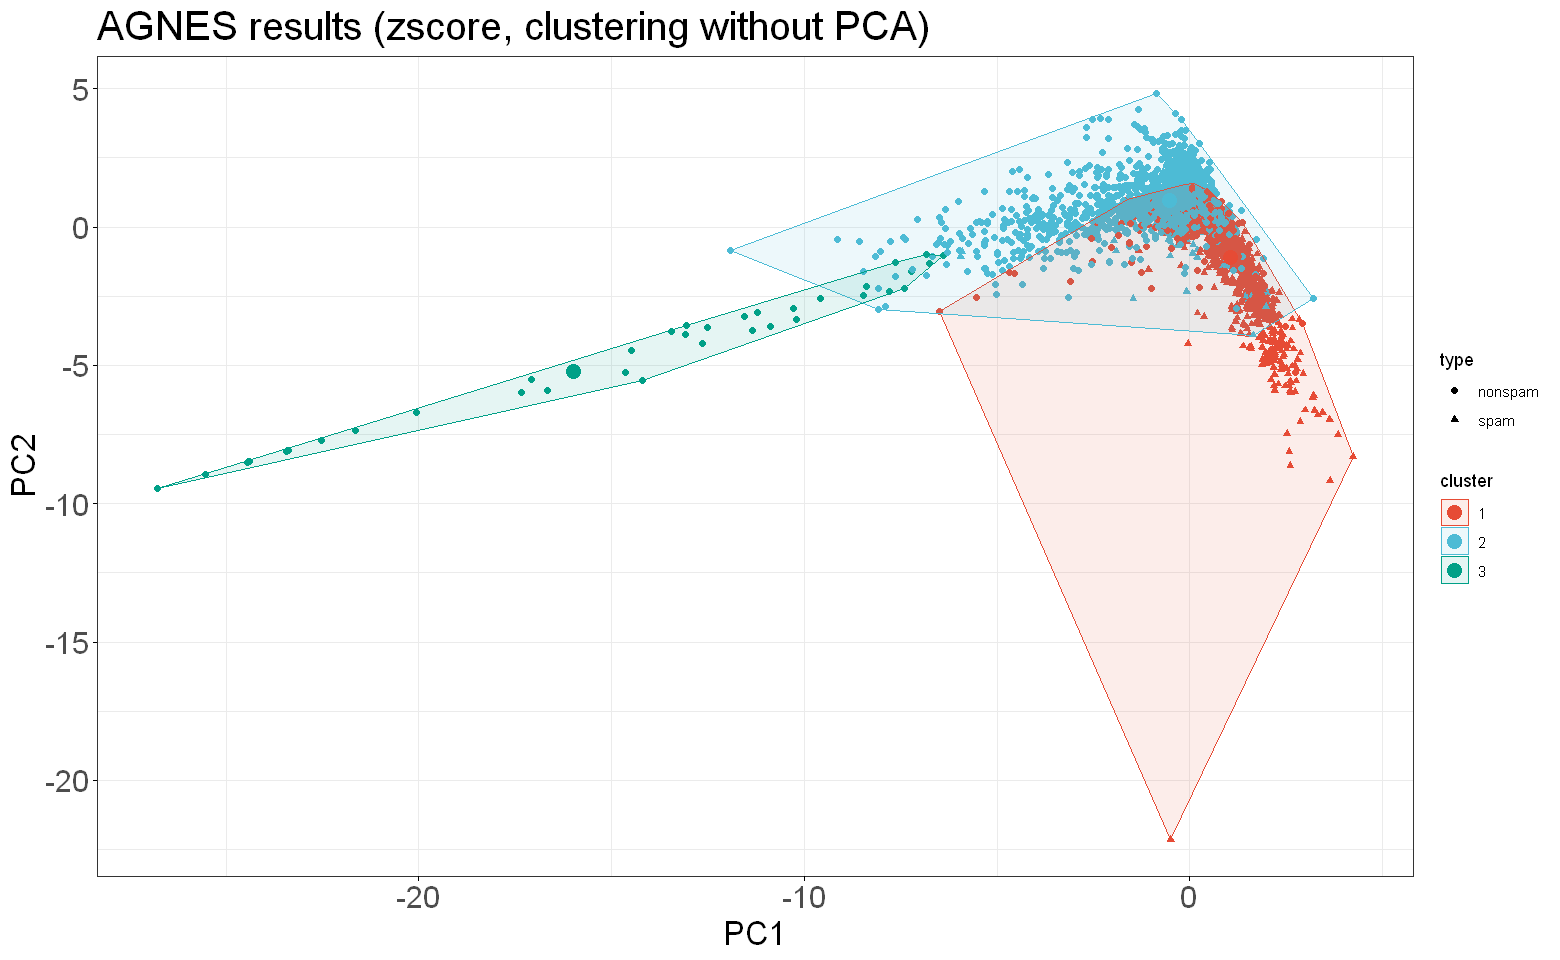

In [53]:
ggscatter(
  agnes_scaled_res, x = "PC1", y = "PC2", 
  color = "cluster", palette = "npg", ellipse = TRUE, ellipse.type = "convex",
  shape = "type", size = 1.5,  legend = "right", ggtheme = theme_bw()) +
  stat_mean(aes(color = cluster), size = 4) +
  ggtitle("AGNES results (zscore, clustering without PCA)") +
  theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))

In [54]:
table(agnes_scaled_res$cluster, agnes_scaled_res$type)

   
    nonspam spam
  1     568 1445
  2    2175  368
  3      45    0

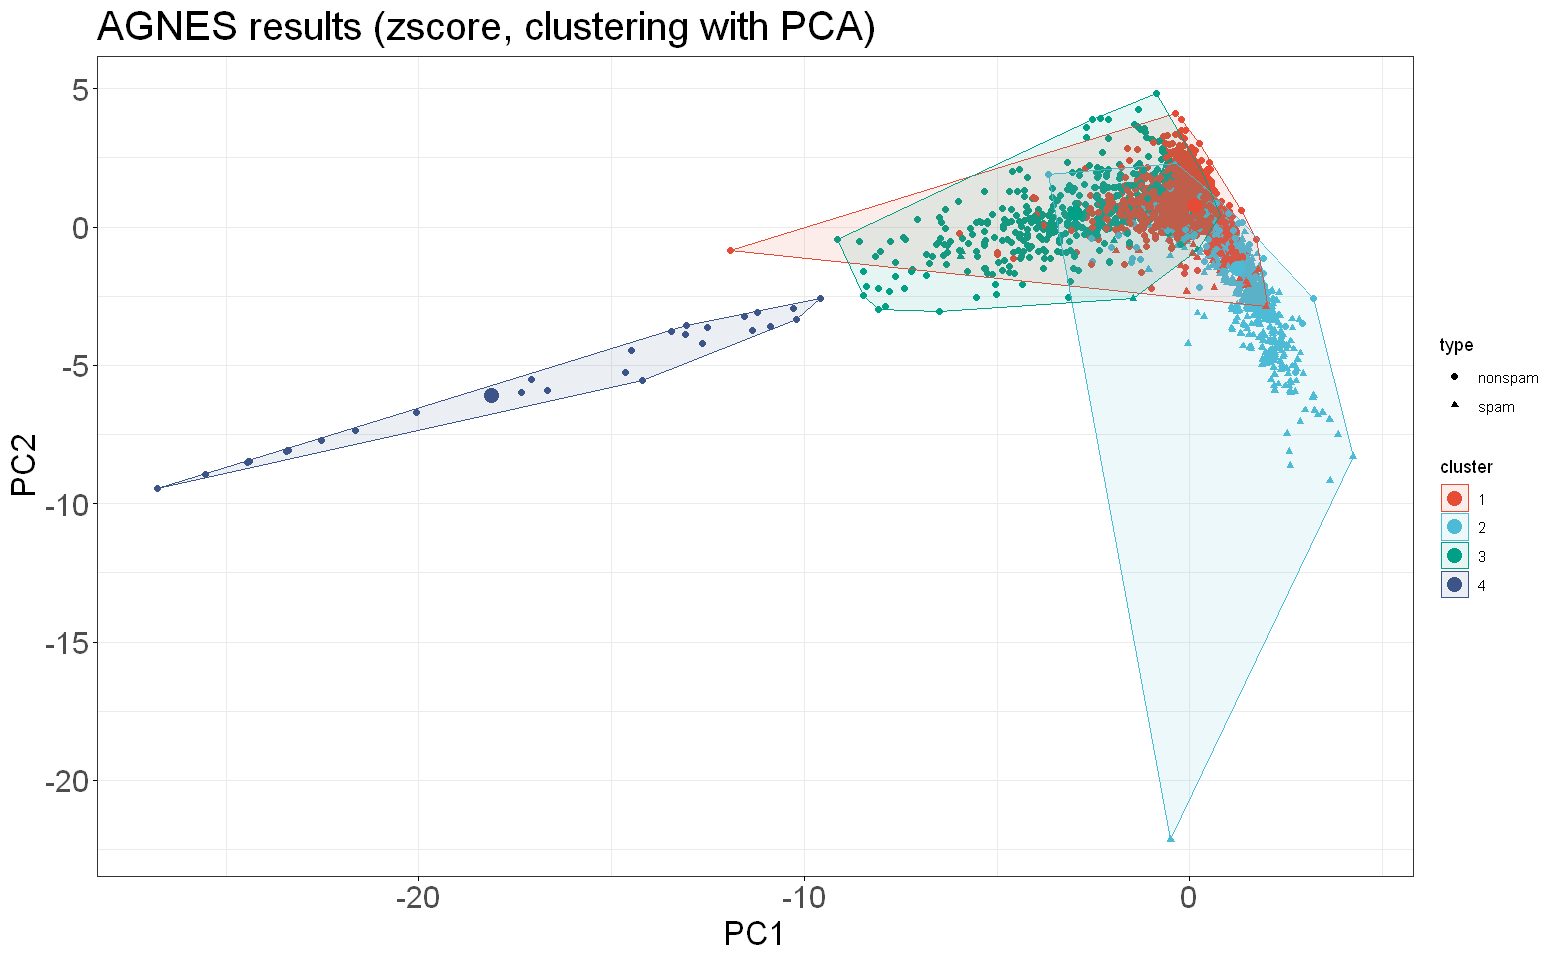

In [55]:
ggscatter(
  agnes_scaled_res_pca, x = "PC1", y = "PC2", 
  color = "cluster", palette = "npg", ellipse = TRUE, ellipse.type = "convex",
  shape = "type", size = 1.5,  legend = "right", ggtheme = theme_bw()) +
  stat_mean(aes(color = cluster), size = 4) +
  ggtitle("AGNES results (zscore, clustering with PCA)") +
  theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))

In [56]:
table(agnes_scaled_res_pca$cluster, agnes_scaled_res_pca$type)

   
    nonspam spam
  1    1995  675
  2     302 1128
  3     455   10
  4      36    0

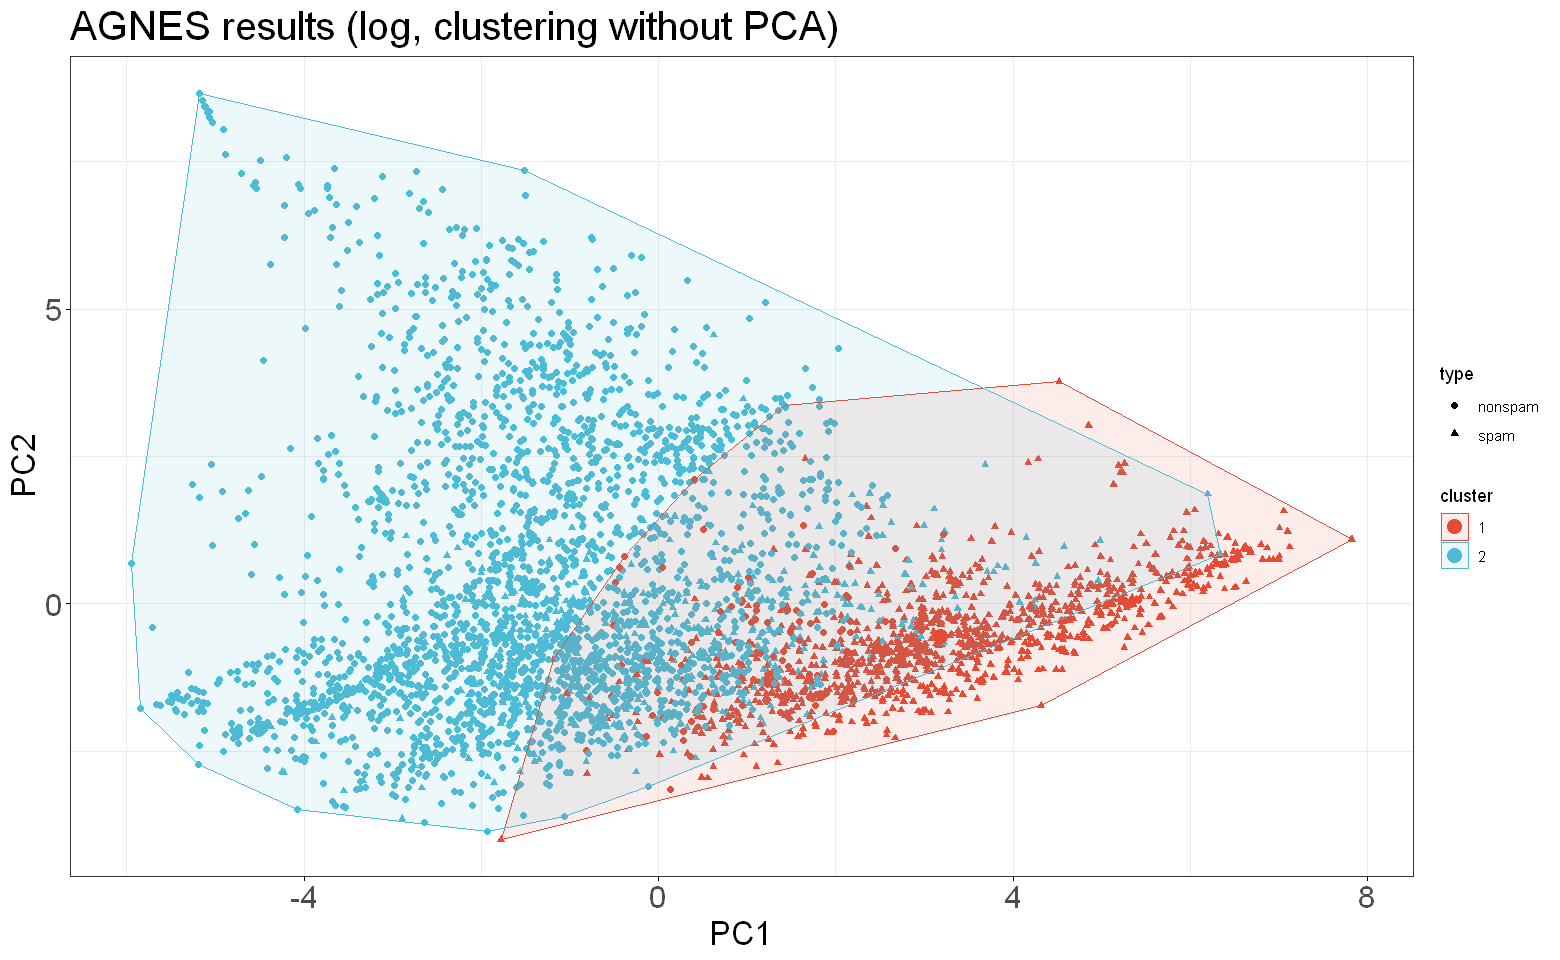

In [57]:
ggscatter(
  agnes_log_res, x = "PC1", y = "PC2", 
  color = "cluster", palette = "npg", ellipse = TRUE, ellipse.type = "convex",
  shape = "type", size = 1.5,  legend = "right", ggtheme = theme_bw()) +
  stat_mean(aes(color = cluster), size = 4) +
  ggtitle("AGNES results (log, clustering without PCA)") +
  theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))

In [58]:
table(agnes_log_res$cluster, agnes_log_res$type)

   
    nonspam spam
  1     117 1322
  2    2671  491

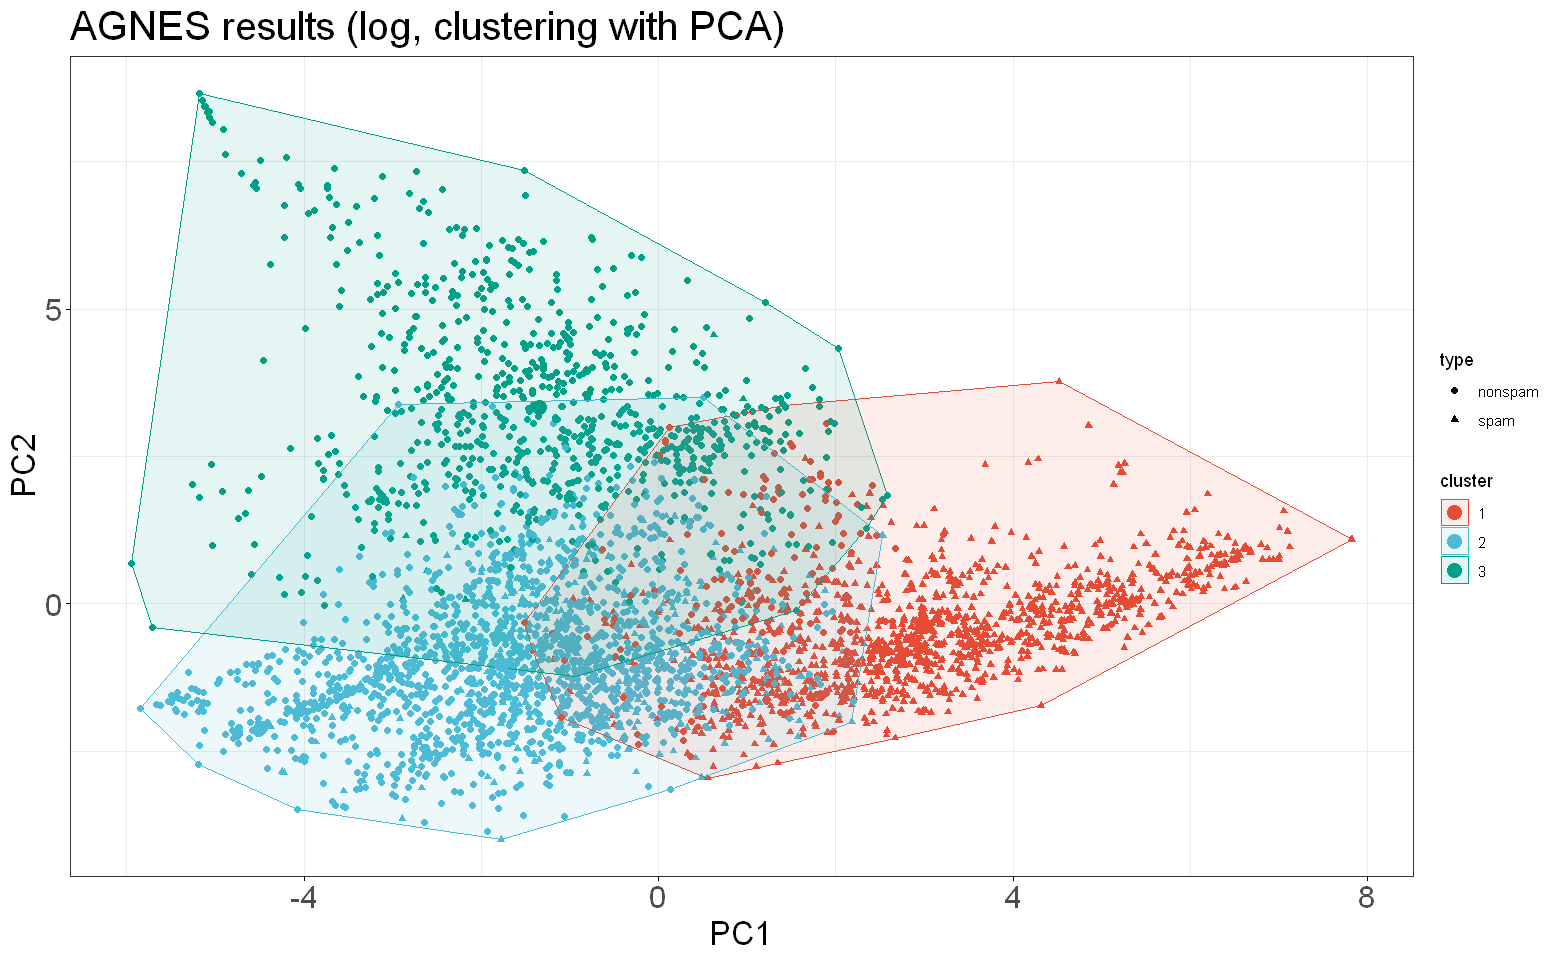

In [59]:
ggscatter(
  agnes_log_res_pca, x = "PC1", y = "PC2", 
  color = "cluster", palette = "npg", ellipse = TRUE, ellipse.type = "convex",
  shape = "type", size = 1.5,  legend = "right", ggtheme = theme_bw()) +
  stat_mean(aes(color = cluster), size = 4) +
  ggtitle("AGNES results (log, clustering with PCA)") +
  theme(
        plot.title = element_text(size = 24),
        axis.title = element_text(size = 20),         
        axis.text.x = element_text(size = 18),        
        axis.text.y = element_text(size = 18))

In [60]:
table(agnes_log_res_pca$cluster, agnes_log_res_pca$type)

   
    nonspam spam
  1     196 1436
  2    1765  367
  3     827   10